### **1. Libraries**

In [1]:
import os
import pandas as pd
import numpy as np

#Data Preprocessing
from sklearn.impute import SimpleImputer #Statistical measurement imputation
from sklearn.preprocessing import StandardScaler

#Visualisations
import seaborn as sns 
import matplotlib.pyplot as plt

#Clustering
from statsmodels.formula.api import ols
import statsmodels.api as sm
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler #Processing for K-Means
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

#NMI
from sklearn.metrics import normalized_mutual_info_score
from sklearn.preprocessing import KBinsDiscretizer #Processing for NMI
from collections import defaultdict

#Preprocessing for Model Evaluation
from sklearn.preprocessing import OneHotEncoder #Categorical encoding
from sklearn.model_selection import train_test_split #Train test split
from sklearn.model_selection import KFold

#Models
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor

#Model Evaluation Metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

### **2. File Directory**

In [2]:
DATA_PATH = "/course/data/a2"

for root, dirs, files in os.walk(DATA_PATH):
        level = root.replace(DATA_PATH, '').count(os.sep)
        indent = ' ' * 4 * (level)
        print('{}{}/'.format(indent, os.path.basename(root)))
        subindent = ' ' * 4 * (level + 1)
        for f in files:
            print('{}{}'.format(subindent, f))

a2/
    games/
        NAmatch.csv
        description.txt
        KRmatch.csv
        EUmatch.csv
    twitter/
        RPI_Expertise_2016_Features.csv
        twitter_expertise.pdf
    weather/
        weather_adelaide.csv
        weather_melbourne.csv
        description.txt
        weather_brisbane.csv
        weather_sydney.csv
        price_demand_data.csv


### **3. Summary Information**

 **3.1. Data Ingest**

In [3]:
#Read csv
rawKRMatchDF = pd.read_csv("/course/data/a2/games/KRmatch.csv")
rawNAMatchDF = pd.read_csv("/course/data/a2/games/NAmatch.csv")
rawEUMatchDF = pd.read_csv("/course/data/a2/games/EUmatch.csv")

 **3.2. NA, EU, KR Datasets Preview**

In [4]:
#First 5 rows of raw dataset (no manipulation) for KR
rawKRMatchDF.head()

,d_spell,f_spell,champion,side,assists,damage_objectives,damage_building,damage_turrets,deaths,kda,kills,level,time_cc,damage_taken,turret_kills,vision_score,damage_total,gold_earned,role,minions_killed
0,14.0,4.0,Leona,Side.blue,6.0,NaN,0.0,0.0,6.0,1.333333,NaN,9.0,23.0,9404.0,0.0,47.0,15214,6043,Other,Few
1,NaN,4.0,Udyr,NaN,8.0,547.0,46480.0,547.0,3.0,6.666667,12.0,16.0,32.0,25782.0,NaN,20.0,194463,12919,TopLane_Jungle,Few
2,14.0,4.0,Xerath,Side.red,2.0,168.0,444.0,168.0,7.0,NaN,0.0,10.0,22.0,14079.0,0.0,38.0,34038,5641,Other,Few
3,14.0,4.0,Zoe,Side.red,8.0,NaN,3082.0,2492.0,3.0,5.000000,7.0,14.0,29.0,11128.0,2.0,NaN,94369,10688,Other,Many
4,4.0,12.0,Camille,Side.red,8.0,6419.0,NaN,6419.0,5.0,4.200000,13.0,15.0,25.0,20404.0,2.0,24.0,110580,12368,TopLane_Jungle,Many


In [5]:
#First 5 rows of raw dataset (no manipulation) for NA
rawNAMatchDF.head()

,d_spell,f_spell,champion,side,assists,damage_objectives,damage_building,damage_turrets,deaths,kda,kills,level,time_cc,damage_taken,turret_kills,vision_score,damage_total,gold_earned,role,minions_killed
0,4.0,12.0,Ziggs,Side.red,11.0,26494.0,29466.0,26494.0,8.0,2.375000,8.0,16.0,19.0,17752.0,5.0,17.0,180966,13756,Other,Many
1,4.0,14.0,Nautilus,Side.blue,18.0,133.0,1139.0,133.0,4.0,5.500000,4.0,15.0,66.0,22332.0,0.0,84.0,35696,10106,Other,Few
2,14.0,4.0,Kindred,Side.red,6.0,2578.0,6804.0,2578.0,12.0,0.916667,5.0,NaN,2.0,32296.0,0.0,27.0,180014,12339,Other,Many
3,3.0,4.0,Jinx,Side.red,7.0,18554.0,32103.0,NaN,5.0,4.200000,14.0,15.0,21.0,17453.0,6.0,36.0,206803,16061,Other,Many
4,4.0,11.0,LeeSin,Side.blue,4.0,0.0,3419.0,0.0,4.0,1.500000,2.0,10.0,10.0,18409.0,0.0,9.0,59584,5811,TopLane_Jungle,Few


In [6]:
#First 5 rows of raw dataset (no manipulation) for EU
rawEUMatchDF.head()

,d_spell,f_spell,champion,side,assists,damage_objectives,damage_building,damage_turrets,deaths,kda,kills,level,time_cc,damage_taken,turret_kills,vision_score,damage_total,gold_earned,role,minions_killed
0,14.0,4.0,Leona,Side.blue,9.0,0.0,63.0,0.0,9.0,NaN,1.0,11.0,39.0,17876.0,0.0,59.0,13802,5933,Other,Few
1,1.0,4.0,Ashe,Side.red,NaN,4885.0,9190.0,4885.0,5.0,2.000000,3.0,14.0,26.0,17148.0,3.0,24.0,84282,10168,Other,Many
2,4.0,12.0,NaN,Side.blue,13.0,1871.0,NaN,1871.0,7.0,3.571429,12.0,14.0,34.0,26211.0,1.0,29.0,109405,12038,Other,Many
3,4.0,11.0,Nunu,Side.red,6.0,0.0,4920.0,0.0,6.0,1.500000,3.0,12.0,21.0,22136.0,0.0,29.0,109911,7570,TopLane_Jungle,Few
4,4.0,14.0,Nautilus,Side.blue,2.0,0.0,0.0,0.0,3.0,1.000000,1.0,8.0,14.0,6680.0,0.0,20.0,17853,4377,Other,Few


 **3.3. NA, EU, KR Datasets Summary Information**

In [7]:
#Describe for KR
rawKRMatchDF.describe()

,d_spell,f_spell,assists,damage_objectives,damage_building,damage_turrets,deaths,kda,kills,level,time_cc,damage_taken,turret_kills,vision_score,damage_total,gold_earned
count,5416.000000,5413.000000,5412.000000,5413.000000,5430.000000,5398.000000,5431.000000,5409.000000,5428.000000,5426.000000,5433.000000,5434.000000,5414.000000,5406.000000,5697.000000,5697.000000
mean,8.167282,6.644929,7.783629,2559.902088,9077.372007,2573.771767,5.479470,3.741579,5.427966,13.297641,18.009755,19547.214391,0.981529,30.086385,107735.695103,10342.235212
std,4.299121,3.955395,5.418976,3238.843264,10276.038566,3240.806333,2.944341,3.987705,4.179253,2.456565,14.565229,9024.544966,1.279242,21.608897,66545.267335,3500.329873
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,0.000000,1736.000000,0.000000,1.000000,3597.000000,2900.000000
25%,4.000000,4.000000,4.000000,336.000000,1533.250000,341.250000,3.000000,1.285714,2.000000,12.000000,8.000000,13133.500000,0.000000,16.000000,58818.000000,7748.000000
50%,7.000000,4.000000,7.000000,1482.000000,5090.000000,1503.500000,5.000000,2.333333,4.000000,13.000000,15.000000,18125.000000,1.000000,24.000000,104732.000000,9961.000000
75%,12.000000,11.000000,11.000000,3681.000000,13057.000000,3705.500000,7.000000,4.600000,8.000000,15.000000,24.000000,24201.000000,2.000000,36.000000,148123.000000,12549.000000
max,21.000000,21.000000,39.000000,50654.000000,68267.000000,50654.000000,16.000000,33.000000,24.000000,18.000000,280.000000,83072.000000,8.000000,175.000000,541303.000000,28541.000000


In [8]:
#Describe for NA
rawNAMatchDF.describe()

,d_spell,f_spell,assists,damage_objectives,damage_building,damage_turrets,deaths,kda,kills,level,time_cc,damage_taken,turret_kills,vision_score,damage_total,gold_earned
count,5482.000000,5473.000000,5472.000000,5499.000000,5457.000000,5461.000000,5501.000000,5488.000000,5478.000000,5476.000000,5444.000000,5492.000000,5473.000000,5476.000000,5760.000000,5760.000000
mean,7.160343,7.725745,7.922697,2545.821058,9460.530695,2533.079290,5.359389,3.750203,5.401424,13.622900,18.775349,20202.839949,0.958706,28.874909,113344.437153,10568.486806
std,4.190502,4.303994,5.560559,3146.678096,10450.884016,3136.874706,2.926819,3.998534,4.240623,2.424769,16.134290,9850.313831,1.242276,20.597235,71069.151838,3517.038190
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,0.000000,1968.000000,0.000000,1.000000,3926.000000,2980.000000
25%,4.000000,4.000000,4.000000,317.000000,1918.000000,313.000000,3.000000,1.333333,2.000000,12.000000,9.000000,13089.000000,0.000000,15.000000,60383.250000,7970.000000
50%,4.000000,6.000000,7.000000,1421.000000,5678.000000,1431.000000,5.000000,2.428571,4.000000,14.000000,16.000000,18578.000000,1.000000,23.000000,107721.000000,10084.000000
75%,12.000000,12.000000,11.000000,3631.500000,13684.000000,3597.000000,7.000000,4.500000,8.000000,15.000000,25.000000,25340.250000,2.000000,35.000000,156376.750000,12779.250000
max,21.000000,21.000000,41.000000,33335.000000,85778.000000,33335.000000,18.000000,35.000000,27.000000,18.000000,304.000000,102473.000000,7.000000,161.000000,557084.000000,26140.000000


In [9]:
#Describe for EU
rawEUMatchDF.describe()

,d_spell,f_spell,assists,damage_objectives,damage_building,damage_turrets,deaths,kda,kills,level,time_cc,damage_taken,turret_kills,vision_score,damage_total,gold_earned
count,5483.000000,5477.000000,5463.000000,5477.000000,5507.000000,5499.000000,5479.000000,5489.000000,5494.000000,5502.000000,5474.000000,5473.000000,5508.000000,5491.000000,5771.000000,5771.000000
mean,6.691592,8.483476,8.257002,2654.386343,9421.129290,2655.238043,5.762730,3.625217,5.706771,13.831879,18.828279,21481.127718,1.035585,30.179202,117283.155086,10861.608733
std,3.962739,4.312055,5.716274,3210.621949,10121.154705,3190.443812,3.034412,3.835677,4.325223,2.370572,14.487105,9927.337849,1.306145,20.811425,70217.520785,3465.530001
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,0.000000,2594.000000,0.000000,2.000000,4493.000000,3093.000000
25%,4.000000,4.000000,4.000000,411.000000,2110.000000,413.000000,4.000000,1.300000,2.000000,12.000000,9.000000,14280.000000,0.000000,16.000000,67314.500000,8313.500000
50%,4.000000,11.000000,7.000000,1671.000000,5755.000000,1693.000000,6.000000,2.400000,5.000000,14.000000,17.000000,19936.000000,1.000000,24.000000,114394.000000,10480.000000
75%,11.000000,12.000000,11.000000,3784.000000,13510.000000,3800.500000,8.000000,4.500000,8.000000,16.000000,26.000000,26990.000000,2.000000,37.000000,160221.500000,13056.500000
max,21.000000,21.000000,41.000000,44162.000000,70006.000000,44162.000000,21.000000,33.000000,30.000000,18.000000,259.000000,78861.000000,9.000000,174.000000,504660.000000,28566.000000


In [10]:
#Print number of rows
print("Number of rows for KR: " + str(len(rawKRMatchDF)))
print("Number of rows for NA: " + str(len(rawNAMatchDF)))
print("Number of rows for EU: " + str(len(rawEUMatchDF)))

#Print number of columns
print("Number of columns for KR: " + str(len(rawKRMatchDF.columns)))
print("Number of columns for NA: " + str(len(rawNAMatchDF.columns)))
print("Number of columns for EU: " + str(len(rawEUMatchDF.columns)))

Number of rows for KR: 5697
Number of rows for NA: 5760
Number of rows for EU: 5771
Number of columns for KR: 20
Number of columns for NA: 20
Number of columns for EU: 20


 **3.4. Concatenating Datasets**

In [11]:
#Confirmed above dimensions are correct to concatenate the datasets vertically.
# Concatenating dataframes from all 3 servers together, with extra column `server`.
rawKRMatchDF["server"] = "KR"
rawNAMatchDF["server"] = "NA"
rawEUMatchDF["server"] = "EU"
allMatchDF = pd.concat([rawKRMatchDF, rawEUMatchDF, rawNAMatchDF])

#Reset index
allMatchDF.index = range(len(allMatchDF))

 **3.5. Full Dataset Preview**

In [12]:
#First 5 rows of raw dataset (no manipulation) for all regions
allMatchDF.head()

,d_spell,f_spell,champion,side,assists,damage_objectives,damage_building,damage_turrets,deaths,kda,...,level,time_cc,damage_taken,turret_kills,vision_score,damage_total,gold_earned,role,minions_killed,server
0,14.0,4.0,Leona,Side.blue,6.0,NaN,0.0,0.0,6.0,1.333333,...,9.0,23.0,9404.0,0.0,47.0,15214,6043,Other,Few,KR
1,NaN,4.0,Udyr,NaN,8.0,547.0,46480.0,547.0,3.0,6.666667,...,16.0,32.0,25782.0,NaN,20.0,194463,12919,TopLane_Jungle,Few,KR
2,14.0,4.0,Xerath,Side.red,2.0,168.0,444.0,168.0,7.0,NaN,...,10.0,22.0,14079.0,0.0,38.0,34038,5641,Other,Few,KR
3,14.0,4.0,Zoe,Side.red,8.0,NaN,3082.0,2492.0,3.0,5.000000,...,14.0,29.0,11128.0,2.0,NaN,94369,10688,Other,Many,KR
4,4.0,12.0,Camille,Side.red,8.0,6419.0,NaN,6419.0,5.0,4.200000,...,15.0,25.0,20404.0,2.0,24.0,110580,12368,TopLane_Jungle,Many,KR


In [13]:
allMatchDF.tail()

,d_spell,f_spell,champion,side,assists,damage_objectives,damage_building,damage_turrets,deaths,kda,...,level,time_cc,damage_taken,turret_kills,vision_score,damage_total,gold_earned,role,minions_killed,server
17223,4.0,NaN,Zoe,Side.red,10.0,NaN,1825.0,1825.0,8.0,1.50,...,15.0,45.0,NaN,2.0,27.0,115875,10909,Other,Many,NA
17224,14.0,4.0,Teemo,Side.blue,1.0,887.0,887.0,887.0,4.0,0.25,...,10.0,12.0,6804.0,0.0,7.0,44452,4633,Other,Many,NA
17225,4.0,14.0,Thresh,Side.blue,5.0,360.0,821.0,360.0,5.0,NaN,...,10.0,16.0,13279.0,0.0,41.0,19306,5946,Other,Few,NA
17226,4.0,6.0,Darius,Side.red,5.0,579.0,998.0,579.0,10.0,1.00,...,NaN,17.0,29059.0,1.0,18.0,80116,9509,TopLane_Jungle,Many,NA
17227,4.0,NaN,Graves,Side.blue,19.0,571.0,27737.0,571.0,5.0,5.80,...,18.0,37.0,34396.0,1.0,33.0,296863,17363,TopLane_Jungle,Few,NA


 **3.6. Full Dataset Summary Information (including Missing Values)**

In [14]:
#Describe for total dataset
allMatchDF.describe()

,d_spell,f_spell,assists,damage_objectives,damage_building,damage_turrets,deaths,kda,kills,level,time_cc,damage_taken,turret_kills,vision_score,damage_total,gold_earned
count,16381.000000,16363.000000,16347.000000,16389.000000,16394.000000,16358.000000,16411.000000,16386.000000,16400.000000,16404.000000,16351.000000,16399.000000,16395.000000,16373.000000,17228.000000,17228.000000
mean,7.336365,7.621830,7.988377,2586.752944,9320.385812,2587.573053,5.533788,3.705488,5.512500,13.585406,18.538683,20412.206354,0.992071,29.712331,112809.107325,10591.858718
std,4.197539,4.261555,5.570246,3198.889272,10283.902947,3189.672056,2.973558,3.941281,4.251065,2.427179,15.084288,9643.915695,1.276541,21.014722,69421.952092,3500.579298
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,0.000000,1736.000000,0.000000,1.000000,3597.000000,2900.000000
25%,4.000000,4.000000,4.000000,351.000000,1858.250000,351.000000,3.000000,1.333333,2.000000,12.000000,9.000000,13471.000000,0.000000,16.000000,61978.250000,8007.500000
50%,4.000000,4.000000,7.000000,1524.000000,5488.000000,1540.500000,5.000000,2.400000,5.000000,14.000000,16.000000,18806.000000,1.000000,24.000000,108920.000000,10169.000000
75%,12.000000,12.000000,11.000000,3701.000000,13442.000000,3703.500000,7.000000,4.500000,8.000000,15.000000,25.000000,25537.500000,2.000000,36.000000,154894.750000,12815.000000
max,21.000000,21.000000,41.000000,50654.000000,85778.000000,50654.000000,21.000000,35.000000,30.000000,18.000000,304.000000,102473.000000,9.000000,175.000000,557084.000000,28566.000000


In [15]:
print("Number of rows for total: " + str(len(allMatchDF)))
print("Number of columns for total: " + str(len(allMatchDF.columns)))

Number of rows for total: 17228
Number of columns for total: 21


In [16]:
#Number of rows with missing values
allMatchDF.isnull().sum()

d_spell              847
f_spell              865
champion             847
side                 780
assists              881
damage_objectives    839
damage_building      834
damage_turrets       870
deaths               817
kda                  842
kills                828
level                824
time_cc              877
damage_taken         829
turret_kills         833
vision_score         855
damage_total           0
gold_earned            0
role                   0
minions_killed         0
server                 0
dtype: int64

 **3.7. Histogram**

array([[<AxesSubplot:title={'center':'d_spell'}>,
        <AxesSubplot:title={'center':'f_spell'}>,
        <AxesSubplot:title={'center':'assists'}>,
        <AxesSubplot:title={'center':'damage_objectives'}>],
       [<AxesSubplot:title={'center':'damage_building'}>,
        <AxesSubplot:title={'center':'damage_turrets'}>,
        <AxesSubplot:title={'center':'deaths'}>,
        <AxesSubplot:title={'center':'kda'}>],
       [<AxesSubplot:title={'center':'kills'}>,
        <AxesSubplot:title={'center':'level'}>,
        <AxesSubplot:title={'center':'time_cc'}>,
        <AxesSubplot:title={'center':'damage_taken'}>],
       [<AxesSubplot:title={'center':'turret_kills'}>,
        <AxesSubplot:title={'center':'vision_score'}>,
        <AxesSubplot:title={'center':'damage_total'}>,
        <AxesSubplot:title={'center':'gold_earned'}>]], dtype=object)

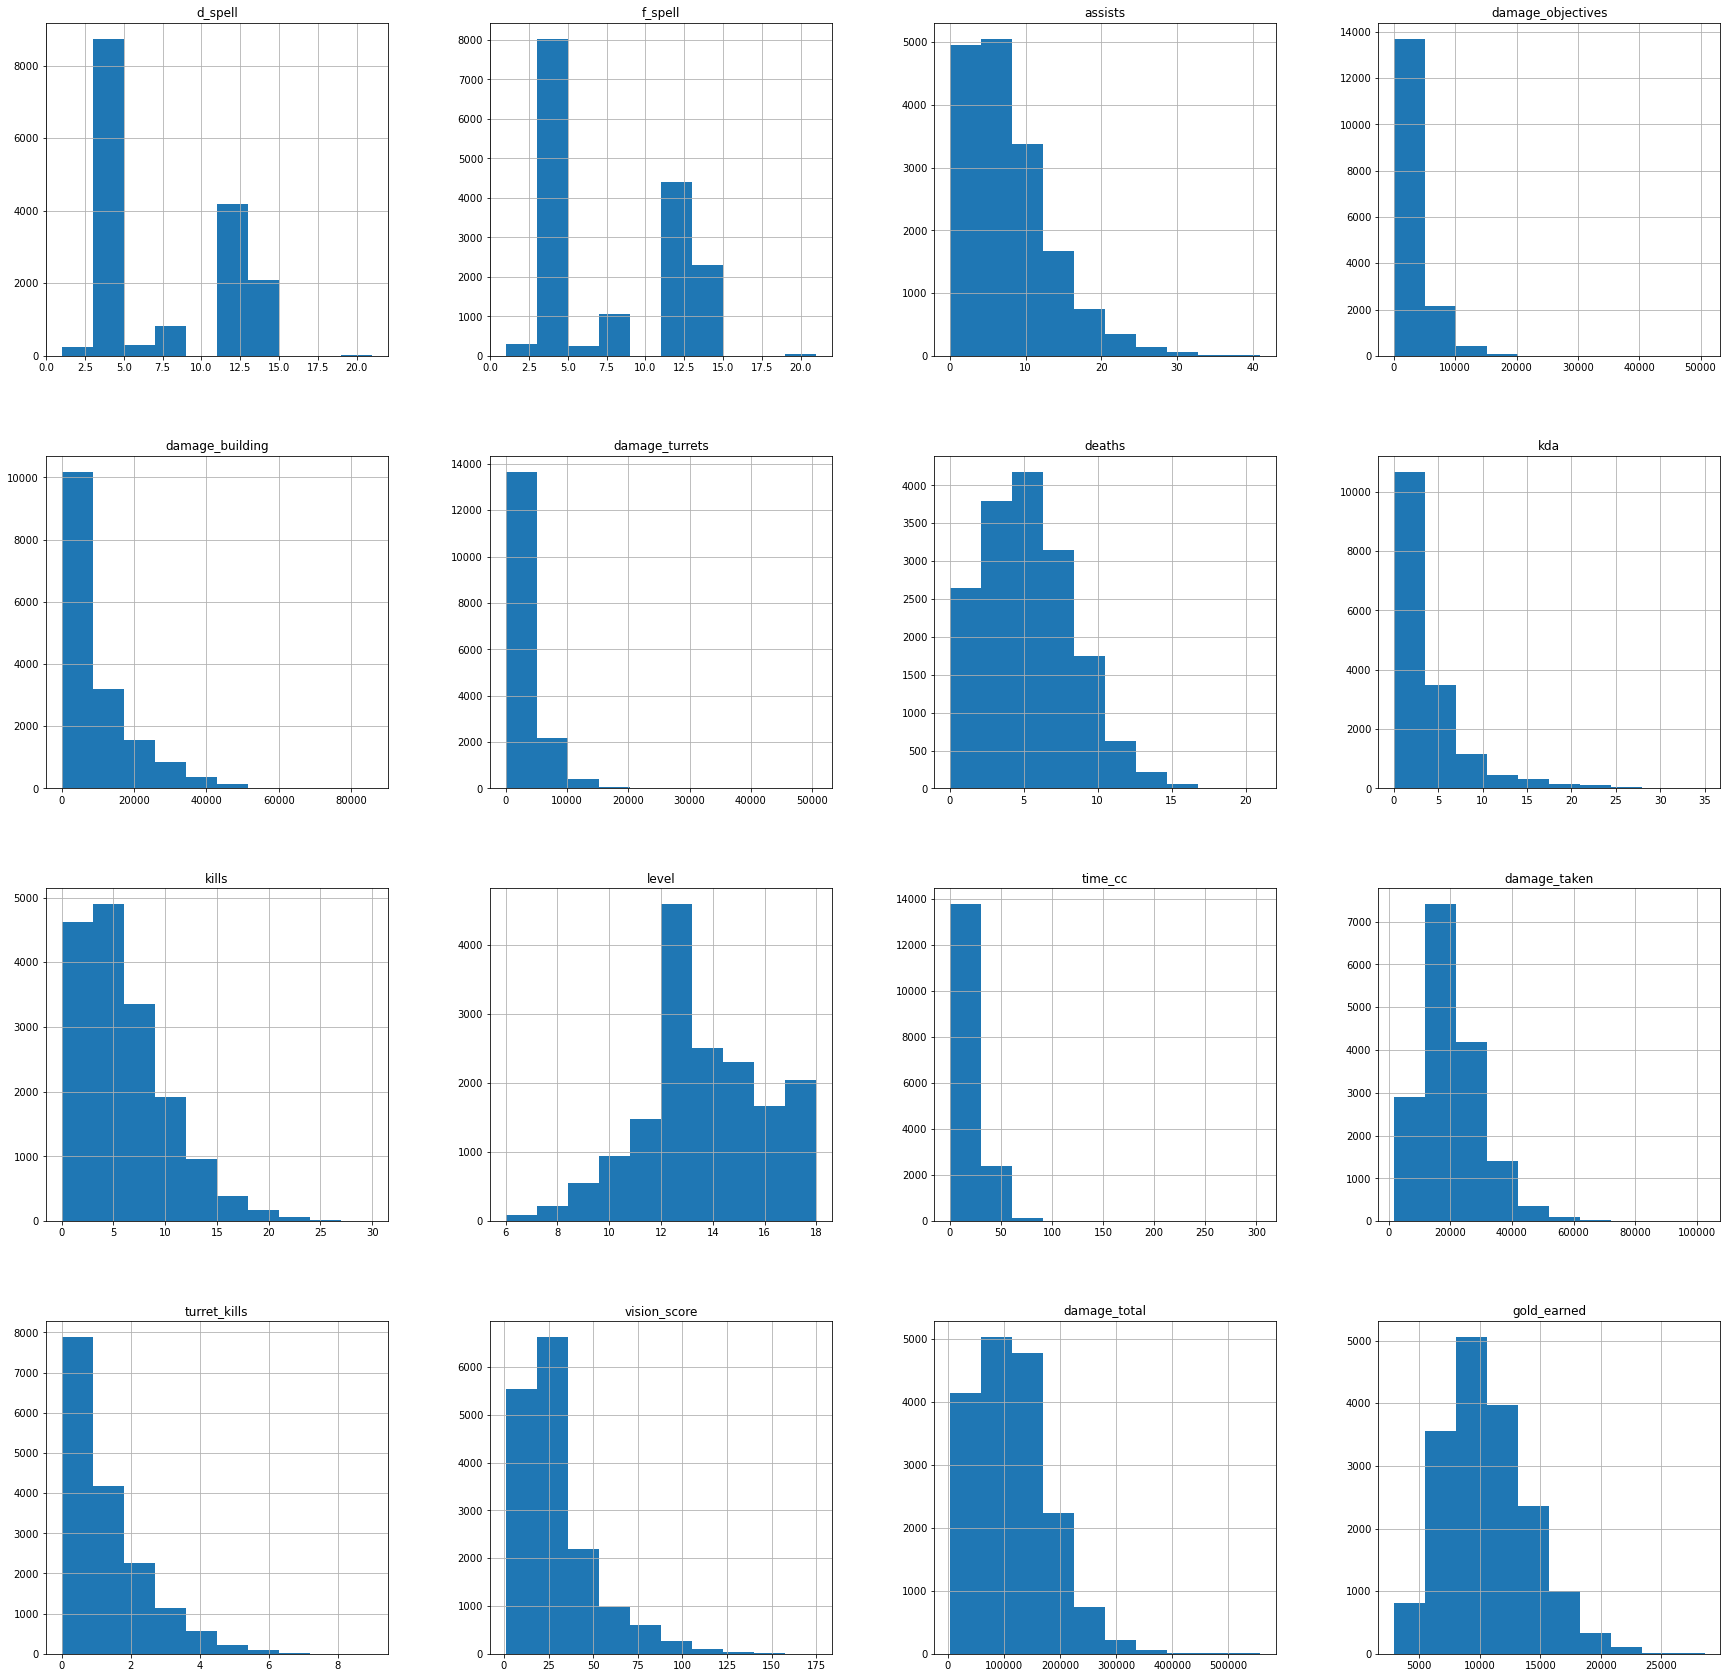

In [17]:
allMatchDF.hist(figsize=(30,30))

 **3.8. Data type of Variables**

In [18]:
#Check type of columns
allMatchDF.dtypes

d_spell              float64
f_spell              float64
champion              object
side                  object
assists              float64
damage_objectives    float64
damage_building      float64
damage_turrets       float64
deaths               float64
kda                  float64
kills                float64
level                float64
time_cc              float64
damage_taken         float64
turret_kills         float64
vision_score         float64
damage_total           int64
gold_earned            int64
role                  object
minions_killed        object
server                object
dtype: object

 **3.9. Categorical Variable Count and Barplot**

This tells us that 'champion', 'side', 'role', 'minions killed' and 'server' are **text categorical data**.

In [19]:
allMatchDF['role'].value_counts()

Other             10172
TopLane_Jungle     7056
Name: role, dtype: int64

<AxesSubplot:>

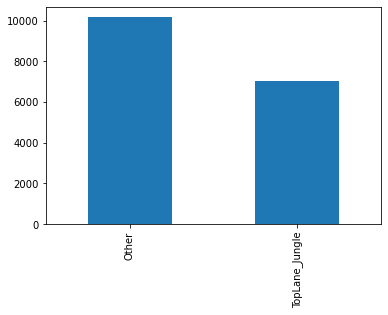

In [20]:
allMatchDF['role'].value_counts().plot(kind='bar')

In [21]:
allMatchDF["side"].value_counts()

Side.red     8236
Side.blue    8212
Name: side, dtype: int64

<AxesSubplot:>

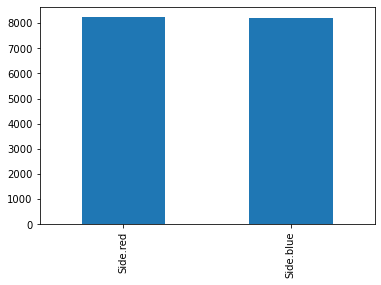

In [22]:
allMatchDF["side"].value_counts().plot(kind='bar')

In [23]:
# Only few and many options
allMatchDF["minions_killed"].value_counts()

Many    9932
Few     7296
Name: minions_killed, dtype: int64

<AxesSubplot:>

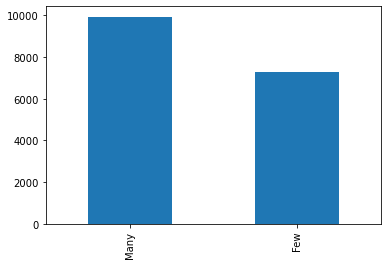

In [24]:
allMatchDF["minions_killed"].value_counts().plot(kind='bar')

In [25]:
allMatchDF["server"].value_counts()

EU    5771
NA    5760
KR    5697
Name: server, dtype: int64

<AxesSubplot:>

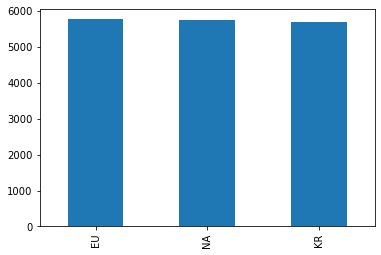

In [26]:
allMatchDF["server"].value_counts().plot(kind='bar')

In [27]:
allMatchDF["champion"].value_counts()

Jhin        500
LeeSin      461
Graves      429
Viego       333
Yone        315
           ... 
Velkoz       10
MasterYi     10
Skarner       9
Rammus        4
Yorick        4
Name: champion, Length: 157, dtype: int64

<AxesSubplot:>

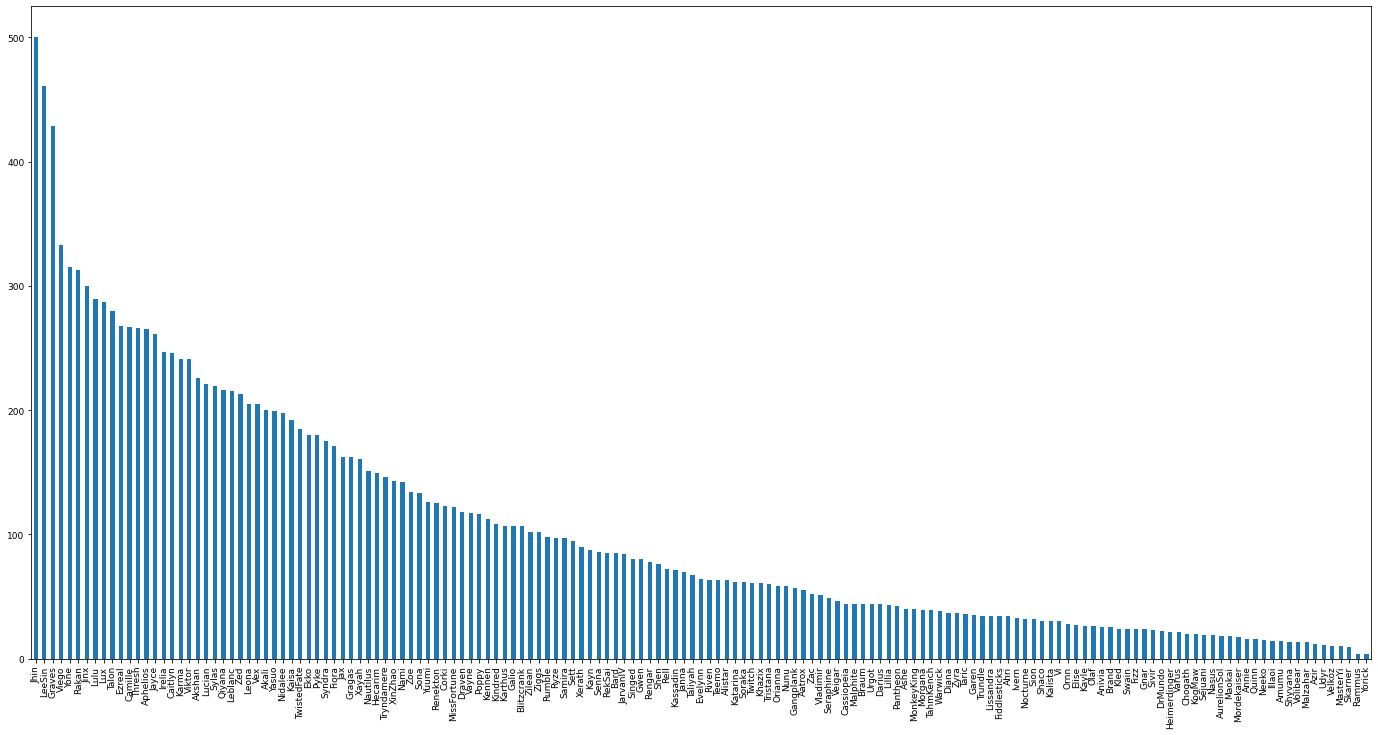

In [28]:
allMatchDF["champion"].value_counts().plot(kind='bar', figsize=(24,12), fontsize = 9)
#plt.xticks()

### **4. Data Preprocessing**

 **4.1. Missing Values Treatments via Imputation**

In [29]:
# MARK: Dealing with missing data
# Fill values based on kda = (kills + assists)/deaths
allMatchDF['kills'] = pd.Series([((row['deaths'] * row['kda']) - row['assists'] if pd.isna(row['kills']) else row['kills']) for i, row in allMatchDF.iterrows()])
allMatchDF['deaths'] = pd.Series([((row['kills'] + row['assists']) / (1 if row['kda']==0 else row['kda']) if pd.isna(row['deaths']) else row['deaths']) for i, row in allMatchDF.iterrows()])
allMatchDF['assists'] = pd.Series([((row['deaths'] * row['kda']) - row['kills'] if pd.isna(row['assists']) else row['assists']) for i, row in allMatchDF.iterrows()])
allMatchDF['kda'] = pd.Series([((row['kills'] + row['assists']) / (1 if row['deaths']==0 else row['deaths']) if pd.isna(row['kda']) else row['kda']) for i, row in allMatchDF.iterrows()])

#Median imputation
allMatchDF['d_spell'] = allMatchDF['d_spell'].fillna(allMatchDF['d_spell'].median())
allMatchDF['f_spell'] = allMatchDF['f_spell'].fillna(allMatchDF['f_spell'].median())
allMatchDF['damage_objectives'] = allMatchDF['damage_objectives'].fillna(allMatchDF['damage_objectives'].median())
allMatchDF['damage_building'] = allMatchDF['damage_building'].fillna(allMatchDF['damage_building'].median())
allMatchDF['damage_turrets'] = allMatchDF['damage_turrets'].fillna(allMatchDF['damage_turrets'].median())
allMatchDF['level'] = allMatchDF['level'].fillna(allMatchDF['level'].median())
allMatchDF['time_cc'] = allMatchDF['time_cc'].fillna(allMatchDF['time_cc'].median())
allMatchDF['damage_taken'] = allMatchDF['damage_taken'].fillna(allMatchDF['damage_taken'].median())
allMatchDF['turret_kills'] = allMatchDF['turret_kills'].fillna(allMatchDF['turret_kills'].median())
allMatchDF['vision_score'] = allMatchDF['vision_score'].fillna(allMatchDF['vision_score'].median())
allMatchDF['damage_total'] = allMatchDF['damage_total'].fillna(allMatchDF['damage_total'].median())
allMatchDF['gold_earned'] = allMatchDF['gold_earned'].fillna(allMatchDF['gold_earned'].median())

In [30]:
# Print number of missing rows
features = list(allMatchDF.columns.values)
for feature in features:
    print(f"{feature:17} has {allMatchDF[feature].isnull().sum()} missing features")

print("\n", allMatchDF.shape[0], "ROWS LEFT")

d_spell           has 0 missing features
f_spell           has 0 missing features
champion          has 847 missing features
side              has 780 missing features
assists           has 121 missing features
damage_objectives has 0 missing features
damage_building   has 0 missing features
damage_turrets    has 0 missing features
deaths            has 106 missing features
kda               has 115 missing features
kills             has 115 missing features
level             has 0 missing features
time_cc           has 0 missing features
damage_taken      has 0 missing features
turret_kills      has 0 missing features
vision_score      has 0 missing features
damage_total      has 0 missing features
gold_earned       has 0 missing features
role              has 0 missing features
minions_killed    has 0 missing features
server            has 0 missing features

 17228 ROWS LEFT


In [31]:
#Dropna for the remaining rows with missing values
allMatchDF = allMatchDF.dropna()

features = list(allMatchDF.columns.values)
for feature in features:
    print(f"{feature:17} has {allMatchDF[feature].isnull().sum()} missing features")

print("\n", allMatchDF.shape[0], "ROWS LEFT")

d_spell           has 0 missing features
f_spell           has 0 missing features
champion          has 0 missing features
side              has 0 missing features
assists           has 0 missing features
damage_objectives has 0 missing features
damage_building   has 0 missing features
damage_turrets    has 0 missing features
deaths            has 0 missing features
kda               has 0 missing features
kills             has 0 missing features
level             has 0 missing features
time_cc           has 0 missing features
damage_taken      has 0 missing features
turret_kills      has 0 missing features
vision_score      has 0 missing features
damage_total      has 0 missing features
gold_earned       has 0 missing features
role              has 0 missing features
minions_killed    has 0 missing features
server            has 0 missing features

 15438 ROWS LEFT


 **4.2. Accuracy Checks**

We want to make sure the values make sense, so we have come up with some logic checks e.g. metrics are non-negative.

In [32]:
#d_spell, f_spell, assists, damage_objectives, ..., etc. should be non-negative
numericals = ['d_spell', 'f_spell', 'assists',
       'damage_objectives', 'damage_building', 'damage_turrets', 'deaths',
       'kda', 'kills', 'level', 'time_cc', 'damage_taken', 'turret_kills',
       'vision_score', 'damage_total', 'gold_earned']

for attribute in list(allMatchDF.columns.values):
    temp = attribute + " is non-negative:"
    if attribute in numericals:
        result = len(allMatchDF.loc[allMatchDF[attribute] < 0]) == 0
    else:
        resule = True
        
    print(f"{temp:40s} {result}")

d_spell is non-negative:                 True
f_spell is non-negative:                 True
champion is non-negative:                True
side is non-negative:                    True
assists is non-negative:                 False
damage_objectives is non-negative:       True
damage_building is non-negative:         True
damage_turrets is non-negative:          True
deaths is non-negative:                  True
kda is non-negative:                     True
kills is non-negative:                   False
level is non-negative:                   True
time_cc is non-negative:                 True
damage_taken is non-negative:            True
turret_kills is non-negative:            True
vision_score is non-negative:            True
damage_total is non-negative:            True
gold_earned is non-negative:             True
role is non-negative:                    True
minions_killed is non-negative:          True
server is non-negative:                  True


In [33]:
# Kills and assists contain negative number entries, which is unreasonable, so these rows were removed. 
allMatchDF = allMatchDF.loc[allMatchDF['assists'] >= 0]
allMatchDF = allMatchDF.loc[allMatchDF['kills'] >= 0]

In [34]:
#Check damage_objectives + damage_building + damage_turrets equals damage_total (not damage_taken)
allMatchDF['damage_objectives'] + allMatchDF['damage_building'] + allMatchDF['damage_turrets'] - allMatchDF['damage_total']

0        -13690.0
2        -33258.0
3        -87271.0
4        -92254.0
5        -15458.0
           ...   
17223   -110701.0
17224    -41791.0
17225    -17765.0
17226    -77960.0
17227   -267984.0
Length: 15405, dtype: float64

 **4.3. Text Preprocessing for Intepretability**

In [35]:
#Text preprocessing on side to be more readable i.e. red, blue
allMatchDF['side'] = allMatchDF['side'].map({'Side.red': 'Red', 'Side.blue': 'Blue'})
allMatchDF.head()

,d_spell,f_spell,champion,side,assists,damage_objectives,damage_building,damage_turrets,deaths,kda,...,level,time_cc,damage_taken,turret_kills,vision_score,damage_total,gold_earned,role,minions_killed,server
0,14.0,4.0,Leona,Blue,6.0,1524.0,0.0,0.0,6.0,1.333333,...,9.0,23.0,9404.0,0.0,47.0,15214,6043,Other,Few,KR
2,14.0,4.0,Xerath,Red,2.0,168.0,444.0,168.0,7.0,0.285714,...,10.0,22.0,14079.0,0.0,38.0,34038,5641,Other,Few,KR
3,14.0,4.0,Zoe,Red,8.0,1524.0,3082.0,2492.0,3.0,5.000000,...,14.0,29.0,11128.0,2.0,24.0,94369,10688,Other,Many,KR
4,4.0,12.0,Camille,Red,8.0,6419.0,5488.0,6419.0,5.0,4.200000,...,15.0,25.0,20404.0,2.0,24.0,110580,12368,TopLane_Jungle,Many,KR
5,4.0,14.0,Alistar,Red,14.0,625.0,1144.0,625.0,3.0,5.000000,...,11.0,37.0,11112.0,0.0,30.0,17852,6471,Other,Few,KR


 **4.4. Tukey Boxplots for Outlier Detection**


Text(0.5, 1.0, 'Boxplot of features (1)')

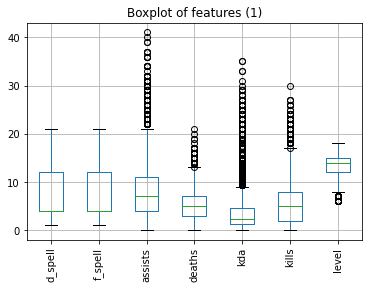

In [36]:
#Box plot of selected features (highlight outliers, distribution of data)
#Outliers don't seem to be measurement error, make sense e.g. extreme KDA values due to low deaths
allMatchDF[['d_spell', 'f_spell', 'assists', 'deaths','kda', 'kills', 'level']].boxplot(rot = 90).set_title("Boxplot of features (1)")

Text(0.5, 1.0, 'Boxplot of features (2)')

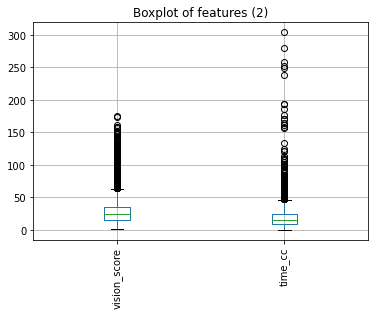

In [37]:
allMatchDF[['vision_score', 'time_cc']].boxplot(rot = 90).set_title("Boxplot of features (2)")

Text(0.5, 1.0, 'Boxplot of features (3)')

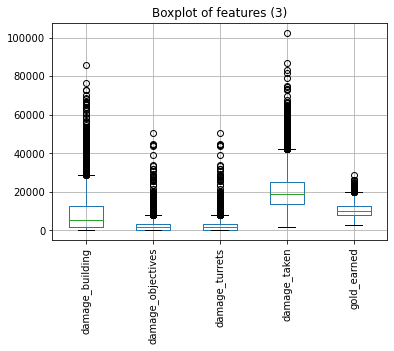

In [38]:
allMatchDF[['damage_building', 'damage_objectives', 'damage_turrets', 'damage_taken', 'gold_earned']].boxplot(rot = 90).set_title("Boxplot of features (3)")

Text(0.5, 1.0, 'Boxplot of features (4)')

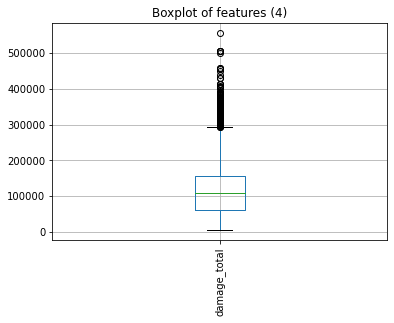

In [39]:
allMatchDF[['damage_total']].boxplot(rot = 90).set_title("Boxplot of features (4)")

### **5. Data Visualisations**

 **5.1. Pairwise Scatterplots for Selected Variables**

Visualise correlation between selected subset of attributes/fields via scatterplots.

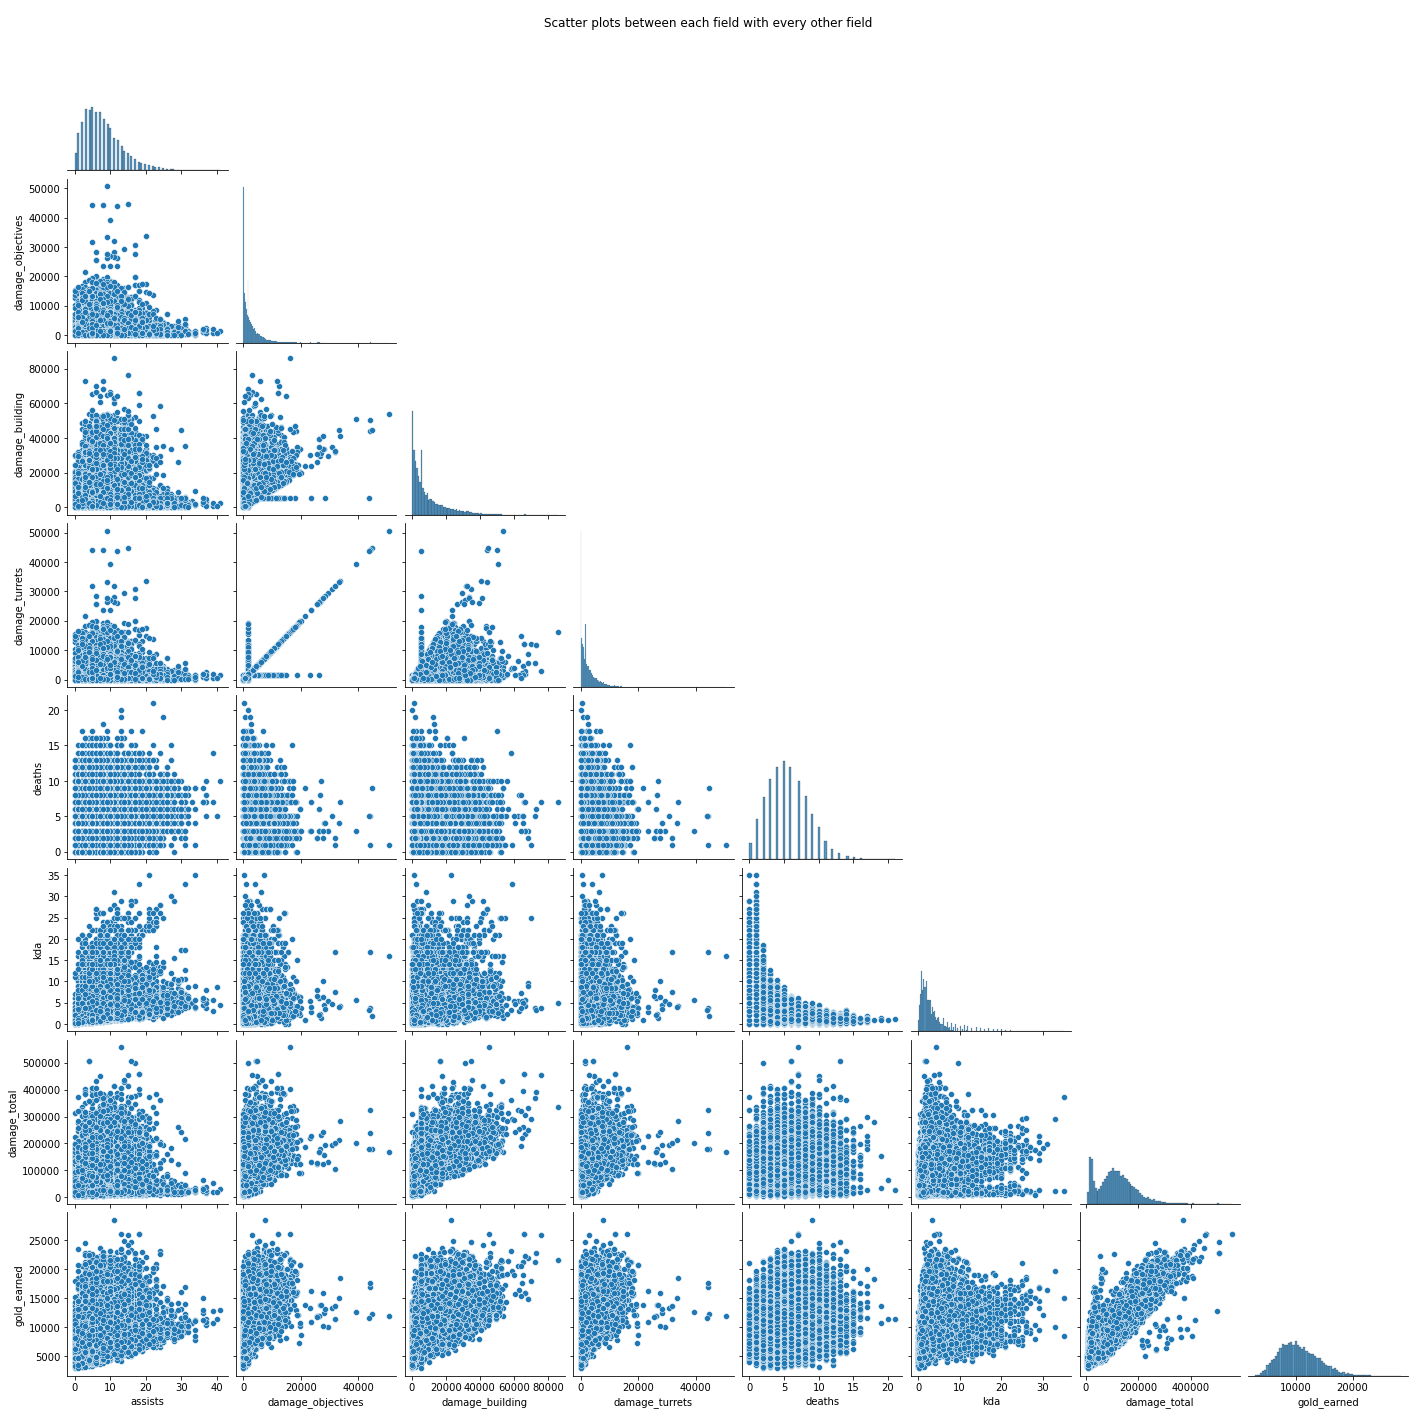

In [40]:
#Select variables to show scatterplots
selectedAttributes = ['assists', 'damage_objectives', 'damage_building', 'damage_turrets', 'deaths', 'kda', 'damage_total', 'gold_earned']

#Produce multiple pairwise bivarate distributions
pairplot = sns.pairplot(allMatchDF[selectedAttributes], corner=True)
pairplot.fig.suptitle("Scatter plots between each field with every other field")
pairplot

 **5.2. Scatterplots Between All Features and gold_earned**

To visualise correlation via scatterplots between all attributes and gold_earned.

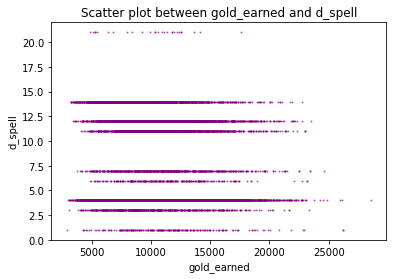

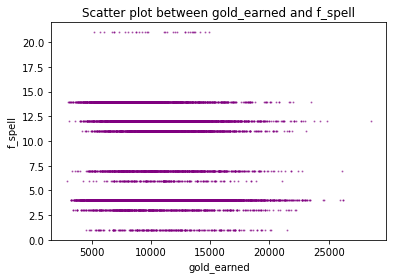

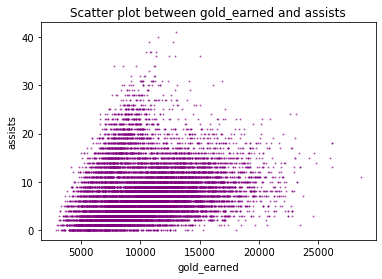

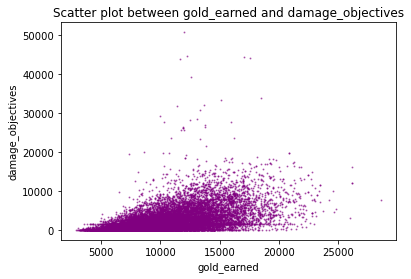

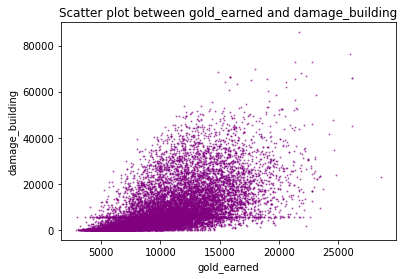

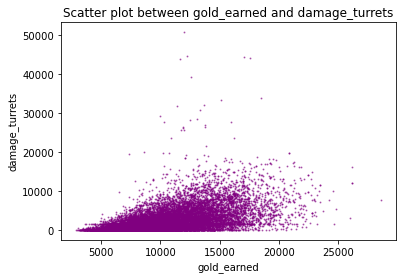

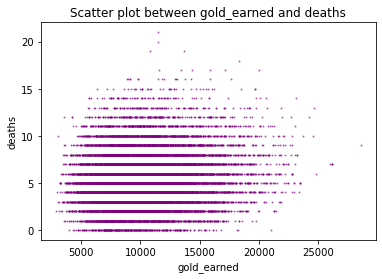

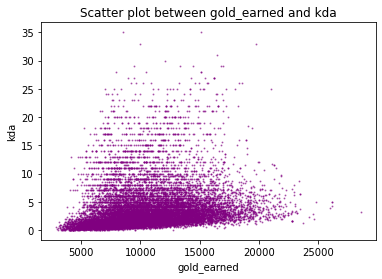

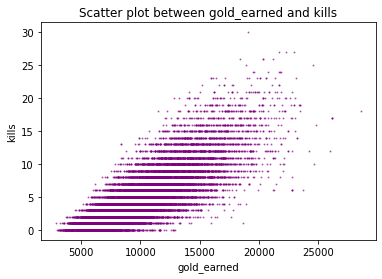

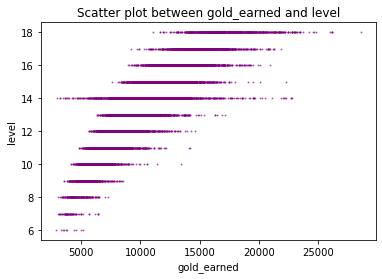

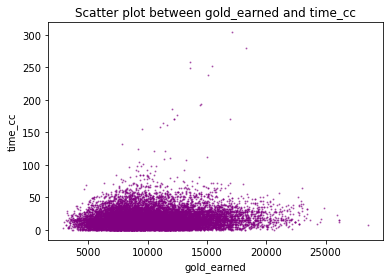

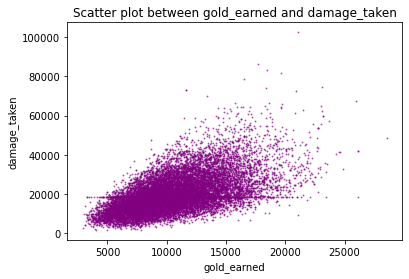

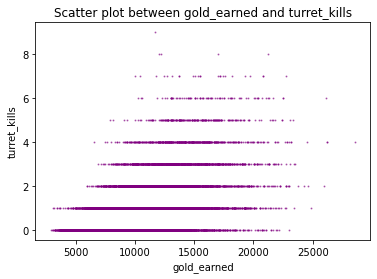

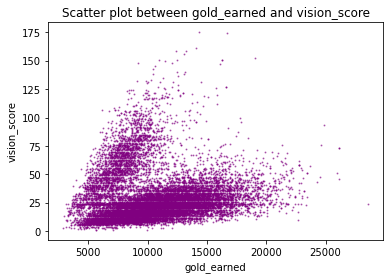

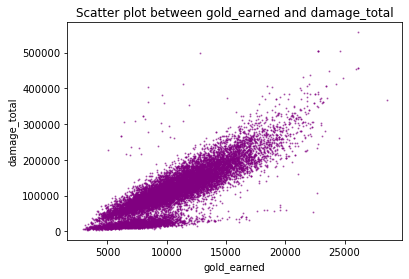

In [41]:
# All numerical attributes other than gold_earned
dotSize, alpha, colour = (1, 0.5, 'purple')
selectedAttributes = ['d_spell', 'f_spell', 'assists', 'damage_objectives', 'damage_building', 'damage_turrets', 'deaths', 'kda', 'kills', 'level', 'time_cc', 'damage_taken', 'turret_kills', 'vision_score', 'damage_total']

# Scatter plots
for attribute in selectedAttributes:
    fig, ax = plt.subplots()
    ax.scatter(allMatchDF['gold_earned'], allMatchDF[attribute], color=colour, alpha=alpha, s=dotSize)
    ax.set_title('Scatter plot between gold_earned and ' + attribute)
    ax.set_xlabel('gold_earned')
    ax.set_ylabel(attribute)

 **5.3. Cluster Analysis Based On Scatter Plot Observations**

We have observed with the scatter plot between gold earned and damage total that there seems to be 2 clusters. We are now hypothesising what variables can explain the 2 clusters.

Hence, we have generated scatter plots seperated by role (i.e. Other and topLane_Jungle) to see how well this variable explains the clusters.

However, further analysis is restricted by the limitation of the dataset, namely the role variable only having two values: TopLane_Jungle and Other. LIMITATION - 'Other' contains many other groups, thus unable to see which roles impact gold_earned/damage_total

We see that role can somewhat explain the clusters. Because of limitation of the dataset... Hence, we now hypothesise that explaining the clusters through champion might be more accurate.

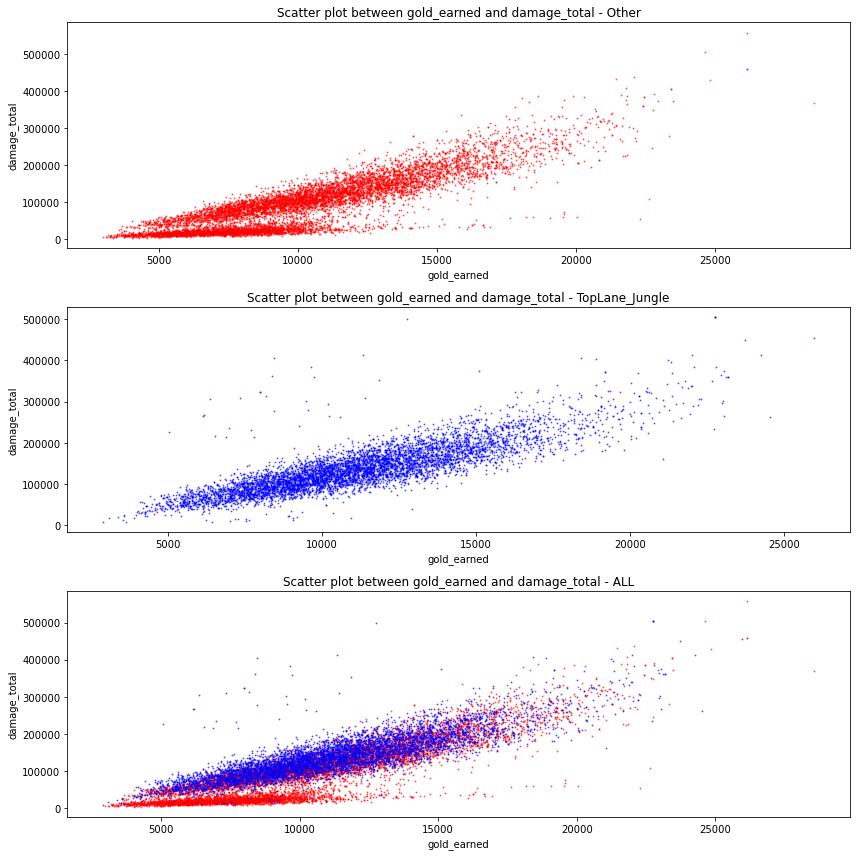

In [42]:
#Seperate data by role value
roleOtherDF = allMatchDF.groupby('role').get_group('Other')
roleTopJungleDF = allMatchDF.groupby('role').get_group('TopLane_Jungle')

fig, ax = plt.subplots(3, figsize=(12, 12))
ax[0].scatter(roleOtherDF['gold_earned'], roleOtherDF['damage_total'], color='red', alpha=alpha, s=dotSize)
ax[1].scatter(roleTopJungleDF['gold_earned'], roleTopJungleDF['damage_total'], color='blue', alpha=alpha, s=dotSize)

# All data - Note the overlap between data points in Other and TopLane_Jungle groups
ax[2].scatter(roleOtherDF['gold_earned'], roleOtherDF['damage_total'], color='red', alpha=alpha, s=dotSize)
ax[2].scatter(roleTopJungleDF['gold_earned'], roleTopJungleDF['damage_total'], color='blue', alpha=alpha, s=dotSize)

# Formatting
ax[0].set_title('Scatter plot between gold_earned and damage_total - Other')
ax[1].set_title('Scatter plot between gold_earned and damage_total - TopLane_Jungle')
ax[2].set_title('Scatter plot between gold_earned and damage_total - ALL')
ax[0].set_xlabel('gold_earned')
ax[1].set_xlabel('gold_earned')
ax[2].set_xlabel('gold_earned')
ax[0].set_ylabel('damage_total')
ax[1].set_ylabel('damage_total')
ax[2].set_ylabel('damage_total')

fig.tight_layout()

 **5.4. Manual Clusters Based on damage_total / gold_earned Relationship**

Now, we have tried explaining the clusters through the variable 'champion', which has many classes. Scatter plot between gold_earned and damage_total separated by champion. The results below show that champion is a potential underlying factor to gold_earned and damage_total as it seems to seperate the two distinct 'clusters' well.

This clustering method is based on the gradient between gold_earned and damage_total (via an univariate linear regression) i.e. champions whose damage_total is highly sensitive to gold_earned and champions that are not.

a) damage_total:

Text(0, 0.5, 'damage_total')

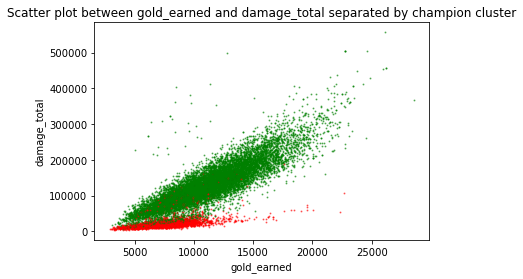

In [43]:
# MARK: Analysis of clusters/trend groups observed in scatter plots
champions = list(set([champion for i, champion in list(allMatchDF['champion'].items()) if type(champion)==str]))

# Keep track of champions belonging to high-gradient 'cluster'/'trend'
highGradientChampions = []
THRESHOLD_HIGH_GRADIENT = 10

fig, ax = plt.subplots()

#For each champion, subset the data and run regression to get gradient then seperate based on threshold.
#If high gradient, colour datapoints as green and low gradient points as red
for champion in champions:
    championData = allMatchDF.groupby('champion').get_group(champion)

    # Find regression equation between gold_earned and damage_total for current champion
    model = ols('damage_total ~ gold_earned', data=championData).fit()
    gradient = model.params[1]

    # GREEN: Plot values corresponding to high-gradient champions
    if gradient >= THRESHOLD_HIGH_GRADIENT:
        highGradientChampions.append(champion)
        ax.scatter(championData['gold_earned'], championData['damage_total'], color='green', alpha=alpha, s=dotSize)

    # RED: Plot values corresponding to low-gradient champions
    else:
        ax.scatter(championData['gold_earned'], championData['damage_total'], color='red', alpha=alpha, s=dotSize)
       
ax.set_title('Scatter plot between gold_earned and damage_total separated by champion cluster')
ax.set_xlabel('gold_earned')
ax.set_ylabel('damage_total')

In [44]:
print("Champions belonging to high-gradient 'cluster'/'trend':", len(highGradientChampions))
print(highGradientChampions)

Champions belonging to high-gradient 'cluster'/'trend': 133
['Riven', 'Rumble', 'XinZhao', 'Graves', 'Fiora', 'Kayn', 'JarvanIV', 'Nunu', 'Swain', 'RekSai', 'Yone', 'Darius', 'Heimerdinger', 'Shyvana', 'Orianna', 'Karthus', 'Viego', 'Fiddlesticks', 'Renekton', 'TahmKench', 'Talon', 'Poppy', 'Skarner', 'Sejuani', 'Kassadin', 'Anivia', 'Tryndamere', 'Sylas', 'Kennen', 'Teemo', 'Gnar', 'AurelionSol', 'Taliyah', 'Ivern', 'DrMundo', 'Fizz', 'Zac', 'Pantheon', 'Sivir', 'Jax', 'TwistedFate', 'Samira', 'Zilean', 'Lucian', 'Seraphine', 'Zed', 'Kindred', 'Lissandra', 'Cassiopeia', 'Nasus', 'Caitlyn', 'Jayce', 'Xayah', 'Shen', 'Amumu', 'Neeko', 'Ashe', 'Rammus', 'Elise', 'Vayne', 'Yasuo', 'Tristana', 'Lux', 'Warwick', 'Vladimir', 'Irelia', 'Azir', 'Akali', 'Illaoi', 'Shaco', 'Syndra', 'MonkeyKing', 'Xerath', 'Chogath', 'Trundle', 'Udyr', 'Kled', 'Diana', 'Ekko', 'Sion', 'Evelynn', 'Camille', 'Kalista', 'Annie', 'Galio', 'Nocturne', 'Aphelios', 'Veigar', 'Yorick', 'Leblanc', 'Mordekaiser', 'Jinx',

b) vision_score:

Text(0, 0.5, 'vision_score')

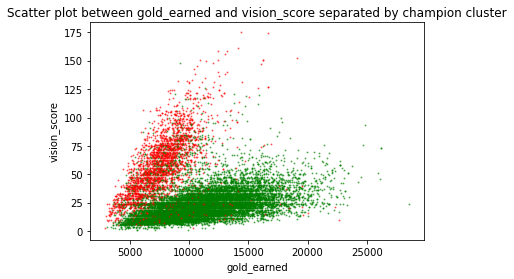

In [45]:
# Scatter plot between gold_earned and vision_score separated by champion
# Use `highGradientChampions` to distinguish between high/low gradient clusters
fig, ax = plt.subplots()

for champion in champions:
    championData = allMatchDF.groupby('champion').get_group(champion)

    # RED: Plot values corresponding to high-gradient champions
    if champion in highGradientChampions:
        ax.scatter(championData['gold_earned'], championData['vision_score'], color='green', alpha=alpha, s=dotSize)
    
    # GREEN: Plot values corresponding to lower-gradient champions
    else:
        ax.scatter(championData['gold_earned'], championData['vision_score'], color='red', alpha=alpha, s=dotSize)

ax.set_title('Scatter plot between gold_earned and vision_score separated by champion cluster')
ax.set_xlabel('gold_earned')
ax.set_ylabel('vision_score')



QIYANA:  damage_total = -22188.396 + 13.896*gold_earned
LULU:    damage_total = -548.434 + 2.375*gold_earned
RAKAN:   damage_total = -548.434 + 2.375*gold_earned



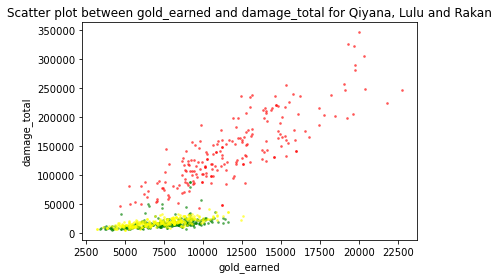

In [46]:
# MARK: Some testing with the data
# Scatter plot between gold_earned and damage_total for Qiyana and Lulu (champions)
fig, ax = plt.subplots()

qiyanaData = allMatchDF.groupby('champion').get_group('Qiyana')
luluData = allMatchDF.groupby('champion').get_group('Lulu')
rakanData = allMatchDF.groupby('champion').get_group('Rakan')

ax.scatter(qiyanaData['gold_earned'], qiyanaData['damage_total'], color='red', alpha=alpha, s=3)
ax.scatter(luluData['gold_earned'], luluData['damage_total'], color='green', alpha=alpha, s=3)
ax.scatter(rakanData['gold_earned'], rakanData['damage_total'], color='yellow', alpha=alpha, s=3)

ax.set_title('Scatter plot between gold_earned and damage_total for Qiyana, Lulu and Rakan')
ax.set_xlabel('gold_earned')
ax.set_ylabel('damage_total')

# Find regression equation between gold_earned and damage_total for Qiyana (champion)
model_qiyana = ols('damage_total ~ gold_earned', data=qiyanaData).fit()
model_lulu = ols('damage_total ~ gold_earned', data=luluData).fit()
model_rakan = ols('damage_total ~ gold_earned', data=rakanData).fit()

summary_qiyana = model_qiyana.summary()
summary_lulu = model_lulu.summary()
summary_rakan = model_rakan.summary()

print(f'\n\n{"QIYANA: ":8} damage_total = {round(model_qiyana.params[0], 3)} + {round(model_qiyana.params[1], 3)}*gold_earned')
print(f'{"LULU: ":8} damage_total = {round(model_lulu.params[0], 3)} + {round(model_lulu.params[1], 3)}*gold_earned')
print(f'{"RAKAN: ":8} damage_total = {round(model_lulu.params[0], 3)} + {round(model_lulu.params[1], 3)}*gold_earned\n')

Based on the analysis above, we can classify each champion into 1 of 2 clusters. Hence, as part of preprocessing, we have created a new feature/attribute that indicates the class which the champion belongs to.

In [47]:
# Assign to cluster 0 if the champion is in highGradientChampions
championCluster = [0 if row['champion'] in highGradientChampions else 1 for i, row in allMatchDF.iterrows()]
allMatchDF['champion_cluster'] = pd.Series(championCluster)
allMatchDF['champion_cluster']

0        1.0
2        0.0
3        0.0
4        1.0
5        1.0
        ... 
17223    NaN
17224    NaN
17225    NaN
17226    NaN
17227    NaN
Name: champion_cluster, Length: 15405, dtype: float64

In [48]:
#Rule for defining value for champion_cluster column
def labelChampionCluster(row):
   if row['champion'] in highGradientChampions:
      return 1
   return 0

In [49]:
#Apply logic to champion_cluster column
allMatchDF['champion_cluster'] = allMatchDF.apply(lambda row: labelChampionCluster(row), axis=1)
allMatchDF['champion_cluster']

0        0
2        1
3        1
4        1
5        0
        ..
17223    1
17224    1
17225    0
17226    1
17227    1
Name: champion_cluster, Length: 15405, dtype: int64

 **5.5. K-Means Clustering**

K-Means clustering first requires a normalisation preprocessing step. 

We see that based on the results (k = 2), it doesn't seem to have been successful in accurately clustering the data.

In [50]:
damageTotalGoldEarnedDF = allMatchDF[['damage_total', 'gold_earned']]

# Normalise data
normalisedDF = MinMaxScaler().fit_transform(damageTotalGoldEarnedDF)
normalisedDF = pd.DataFrame(normalisedDF, columns=damageTotalGoldEarnedDF.columns)

NOTE: k-means clustering NOT successful in clustering the data


Text(0, 0.5, 'damage_total')

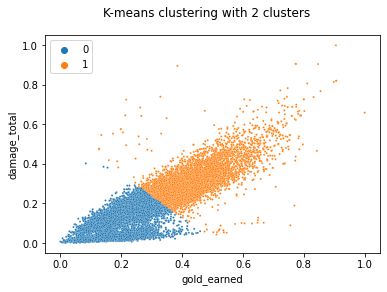

In [51]:
# K-means clustering (k=2)
clusters = KMeans(n_clusters=2).fit(normalisedDF)

print("NOTE: k-means clustering NOT successful in clustering the data")

fig, ax = plt.subplots()
plt.suptitle('K-means clustering with 2 clusters')
sns.scatterplot(x=normalisedDF['gold_earned'], y=normalisedDF['damage_total'], hue=clusters.labels_, s=4)
ax.set_xlabel('gold_earned')
ax.set_ylabel('damage_total')

<AxesSubplot:xlabel='gold_earned', ylabel='damage_total'>

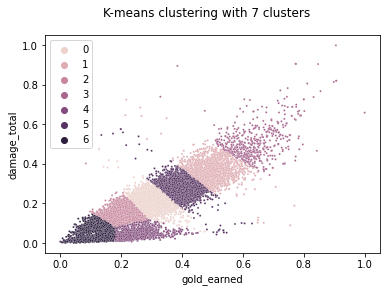

In [52]:
# K-means clustering (k=7)
clusters = KMeans(n_clusters=7).fit(normalisedDF)

fig, ax = plt.subplots()
plt.suptitle('K-means clustering with 7 clusters')
sns.scatterplot(x=normalisedDF['gold_earned'], y=normalisedDF['damage_total'], hue=clusters.labels_, s=4)

 **5.6. Hierarchical Clustering**

We have also tried hierachical clustering (2 and 3 clusters), but it doesn't seem to work due to all of the noise and outliers.

Text(0, 0.5, 'damage_total')

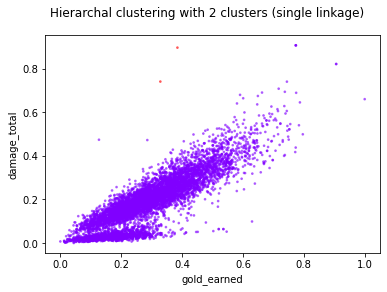

In [53]:
# Hierarchical clustering (2 clusters - single linkage)
dataHierarchyClustering = normalisedDF[['damage_total', 'gold_earned']].head(7000)
cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='single')
cluster.fit_predict(dataHierarchyClustering)
plt.suptitle('Hierarchal clustering with 2 clusters (single linkage)')
plt.scatter(dataHierarchyClustering['gold_earned'],dataHierarchyClustering['damage_total'], c=cluster.labels_, cmap='rainbow', s=3, alpha=0.5)
plt.xlabel('gold_earned')
plt.ylabel('damage_total')

Text(0, 0.5, 'damage_total')

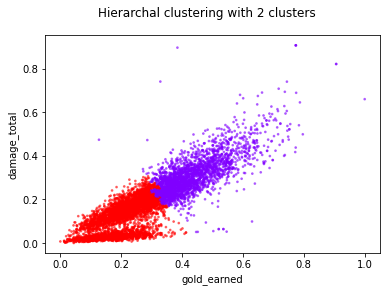

In [54]:
# Hierarchical clustering (2 clusters)
dataHierarchyClustering = normalisedDF[['damage_total', 'gold_earned']].head(7000)
cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')
cluster.fit_predict(dataHierarchyClustering)
plt.suptitle('Hierarchal clustering with 2 clusters')
plt.scatter(dataHierarchyClustering['gold_earned'],dataHierarchyClustering['damage_total'], c=cluster.labels_, cmap='rainbow', s=3, alpha=0.5)
plt.xlabel('gold_earned')
plt.ylabel('damage_total')

Text(0, 0.5, 'damage_total')

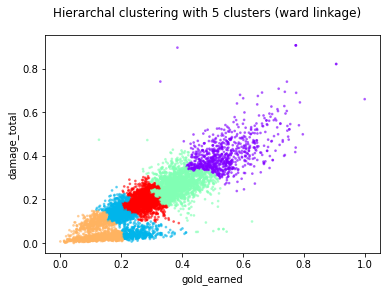

In [55]:
# 5 clusters
cluster = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')
cluster.fit_predict(dataHierarchyClustering)
plt.suptitle('Hierarchal clustering with 5 clusters (ward linkage)')
plt.scatter(dataHierarchyClustering['gold_earned'],dataHierarchyClustering['damage_total'], c=cluster.labels_, cmap='rainbow', s=3, alpha=0.5)
plt.xlabel('gold_earned')
plt.ylabel('damage_total')

 **5.7. Normalised Mututal Information (NMI) Between All Features**

Quantitatively measure correlation between all attributes and gold_earned.

Use mutual information because we have some discrete data and non-linear correlations.

Use min here because in NMI, we want to have our demoninator to be min(H(X), H(Y)).

In [56]:
# Discretise continuous data in allMatchDF
featuresRequiringDiscretisation = [
    'assists', 'damage_objectives', 'damage_building', 'damage_turrets', 
    'deaths', 'kda', 'kills', 'level', 'time_cc', 'damage_taken', 'turret_kills', 'vision_score', 
    'damage_total', 'gold_earned']

discretisedAllMatchDF = allMatchDF.copy()

for feature in featuresRequiringDiscretisation:
    columnFeature = allMatchDF[[feature]]
    equal_width = KBinsDiscretizer(n_bins=200, encode='ordinal', strategy='quantile')
    discretisedAllMatchDF[feature] = pd.DataFrame(equal_width.fit_transform(columnFeature).astype(int))

discretisedAllMatchDF[featuresRequiringDiscretisation].head()

/usr/lib/python3.10/site-packages/sklearn/preprocessing/_discretization.py:230: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 0 are removed. Consider decreasing the number of bins.
  warnings.warn(
/usr/lib/python3.10/site-packages/sklearn/preprocessing/_discretization.py:230: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 0 are removed. Consider decreasing the number of bins.
  warnings.warn(
/usr/lib/python3.10/site-packages/sklearn/preprocessing/_discretization.py:230: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 0 are removed. Consider decreasing the number of bins.
  warnings.warn(
/usr/lib/python3.10/site-packages/sklearn/preprocessing/_discretization.py:230: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 0 are removed. Consider decreasing the number of bins.
  warnings.warn(
/usr/lib/python3.10/site-packages/sklearn/preprocessing/_discretization.py:230: UserWarning: Bins whose widt

,assists,damage_objectives,damage_building,damage_turrets,deaths,kda,kills,level,time_cc,damage_taken,turret_kills,vision_score,damage_total,gold_earned
0,6.0,67.0,0.0,0.0,6.0,36.0,2.0,2.0,23.0,17.0,0.0,42.0,9.0,15.0
2,8.0,67.0,60.0,91.0,3.0,96.0,7.0,7.0,29.0,28.0,2.0,20.0,81.0,111.0
3,8.0,141.0,89.0,141.0,5.0,89.0,13.0,8.0,25.0,108.0,2.0,20.0,102.0,143.0
4,15.0,32.0,27.0,32.0,3.0,96.0,1.0,4.0,37.0,28.0,0.0,26.0,14.0,21.0
5,21.0,27.0,20.0,27.0,6.0,84.0,2.0,6.0,39.0,86.0,0.0,54.0,20.0,54.0


In [57]:
# Get NMI scores for each pair of attributes, ignoring NaN values
def getNMIscores(datatable, THRESHOLD):

    allAttributes = list(datatable)

    nmiInformation = defaultdict(list)
    nmiInformationWithThreshold = defaultdict(list)

    for attribute1 in allAttributes:
        for attribute2 in allAttributes:

            # Only keep the records where both attribute1 and attribute2 are not null as we need to consider the relationship between the pair of values
            attributesData = datatable[[attribute1, attribute2]].loc[datatable[attribute1].notnull()].loc[datatable[attribute2].notnull()]
            attributesData.index = range(len(attributesData))

            # Calculate nmi
            nmi = normalized_mutual_info_score(list(attributesData[attribute1]), list(attributesData[attribute2]), average_method='min')
            nmiInformation[attribute1].append(nmi)

            # Only display abs(nmi) >= threshold and if attribute1 != attribute2 (in which case NMI = 1.0)
            nmi = nmi if abs(nmi) >= THRESHOLD and attribute1 != attribute2 else '-'
            nmiInformationWithThreshold[attribute1].append(nmi)

    return (nmiInformation, nmiInformationWithThreshold)

In [58]:
# Get NMI scores for the whole single table
nmiInformation, nmiInformationWithThreshold = getNMIscores(discretisedAllMatchDF, THRESHOLD=0.1)

# Dataframe: All NMI scores data
nmiVisualised = pd.DataFrame(nmiInformation)
nmiVisualised.index = list(discretisedAllMatchDF)

# Dataframe: nmiVisualised with threshold applied
nmiVisualisedWithThreshold = pd.DataFrame(nmiInformationWithThreshold)
nmiVisualisedWithThreshold.index = list(discretisedAllMatchDF)

print("Table 1: NMI scores between each pair of attributes (displaying all data)")
nmiVisualised

Table 1: NMI scores between each pair of attributes (displaying all data)


,d_spell,f_spell,champion,side,assists,damage_objectives,damage_building,damage_turrets,deaths,kda,...,time_cc,damage_taken,turret_kills,vision_score,damage_total,gold_earned,role,minions_killed,server,champion_cluster
d_spell,1.000000,0.273646,0.359078,5.833858e-04,0.004412,0.031273,0.034305,0.031078,0.002793,0.023635,...,0.010317,0.035412,0.000845,0.012860,0.035712,0.036782,2.419635e-01,0.227766,0.020585,0.148795
f_spell,0.273646,1.000000,0.367901,1.654916e-04,0.005116,0.030099,0.033929,0.031526,0.002854,0.021642,...,0.008624,0.037165,0.001355,0.014017,0.035312,0.036952,2.446514e-01,0.253347,0.023516,0.173435
champion,0.359078,0.367901,1.000000,8.501863e-03,0.048788,0.154858,0.178707,0.155020,0.034089,0.125940,...,0.075780,0.183264,0.023958,0.090736,0.187781,0.190974,6.899911e-01,0.672646,0.071045,1.000000
side,0.000583,0.000165,0.008502,1.000000e+00,0.000992,0.007912,0.009722,0.008064,0.000536,0.006193,...,0.002723,0.012717,0.000286,0.002990,0.010628,0.011296,9.210540e-07,0.000140,0.000072,0.000359
assists,0.004412,0.005116,0.048788,9.920580e-04,1.000000,0.066873,0.086721,0.066959,0.008756,0.147638,...,0.063510,0.082063,0.022293,0.095603,0.119983,0.101522,1.507415e-03,0.000639,0.001334,0.001595
damage_objectives,0.031273,0.030099,0.154858,7.912310e-03,0.066873,1.000000,0.301201,0.848800,0.044716,0.165180,...,0.095711,0.221142,0.321329,0.116377,0.245877,0.252176,8.828410e-03,0.008480,0.012354,0.011906
damage_building,0.034305,0.033929,0.178707,9.722009e-03,0.086721,0.301201,1.000000,0.300357,0.046405,0.186582,...,0.108891,0.239070,0.174015,0.143195,0.271019,0.267497,9.786258e-03,0.009816,0.013839,0.014750
damage_turrets,0.031078,0.031526,0.155020,8.063611e-03,0.066959,0.848800,0.300357,1.000000,0.044670,0.164535,...,0.096333,0.221101,0.320365,0.116599,0.246463,0.250975,9.506321e-03,0.007815,0.011319,0.013071
deaths,0.002793,0.002854,0.034089,5.356256e-04,0.008756,0.044716,0.046405,0.044670,1.000000,0.536958,...,0.017075,0.105497,0.013588,0.019668,0.048751,0.051777,9.865834e-04,0.000444,0.002302,0.001302
kda,0.023635,0.021642,0.125940,6.192830e-03,0.147638,0.165180,0.186582,0.164535,0.536958,1.000000,...,0.078948,0.188934,0.064528,0.100074,0.200217,0.208580,7.606859e-03,0.008107,0.008925,0.010255


In [59]:
print("Table 2: NMI scores between each pair of attributes (displaying only data whose NMIs >= threshold)")
nmiVisualisedWithThreshold

Table 2: NMI scores between each pair of attributes (displaying only data whose NMIs >= threshold)


,d_spell,f_spell,champion,side,assists,damage_objectives,damage_building,damage_turrets,deaths,kda,...,time_cc,damage_taken,turret_kills,vision_score,damage_total,gold_earned,role,minions_killed,server,champion_cluster
d_spell,-,0.273646,0.359078,-,-,-,-,-,-,-,...,-,-,-,-,-,-,0.241963,0.227766,-,0.148795
f_spell,0.273646,-,0.367901,-,-,-,-,-,-,-,...,-,-,-,-,-,-,0.244651,0.253347,-,0.173435
champion,0.359078,0.367901,-,-,-,0.154858,0.178707,0.15502,-,0.12594,...,-,0.183264,-,-,0.187781,0.190974,0.689991,0.672646,-,1.0
side,-,-,-,-,-,-,-,-,-,-,...,-,-,-,-,-,-,-,-,-,-
assists,-,-,-,-,-,-,-,-,-,0.147638,...,-,-,-,-,0.119983,0.101522,-,-,-,-
damage_objectives,-,-,0.154858,-,-,-,0.301201,0.8488,-,0.16518,...,-,0.221142,0.321329,0.116377,0.245877,0.252176,-,-,-,-
damage_building,-,-,0.178707,-,-,0.301201,-,0.300357,-,0.186582,...,0.108891,0.23907,0.174015,0.143195,0.271019,0.267497,-,-,-,-
damage_turrets,-,-,0.15502,-,-,0.8488,0.300357,-,-,0.164535,...,-,0.221101,0.320365,0.116599,0.246463,0.250975,-,-,-,-
deaths,-,-,-,-,-,-,-,-,-,0.536958,...,-,0.105497,-,-,-,-,-,-,-,-
kda,-,-,0.12594,-,0.147638,0.16518,0.186582,0.164535,0.536958,-,...,-,0.188934,-,0.100074,0.200217,0.20858,-,-,-,-


 **5.8. NMI Scores Against gold_earned**

In particular, we are interested in which features/attributes are most correlated with gold_earned.

Text(0, 0.5, 'attribute')

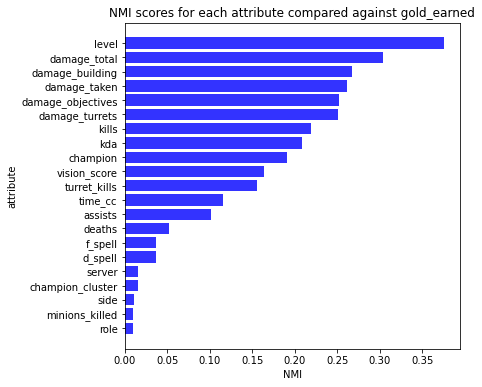

In [60]:
# Bar chart of NMI scores for each attribute compared against gold_earned
fig, ax = plt.subplots(figsize=(6,6))
sortedNMIs = sorted(list(nmiVisualised['gold_earned'].items()), key=lambda x: x[1])

# Remove gold_earned from sortedNMIs, because we are comparing against gold_earned
sortedNMIs.pop(len(sortedNMIs)-1)

# Make graph
keys = [attribute for attribute, nmi in sortedNMIs]
vals = [nmi for attribute, nmi in sortedNMIs]
ax.barh(keys, vals, color='blue', alpha=0.8)
ax.set_title('NMI scores for each attribute compared against gold_earned')
ax.set_xlabel('NMI')
ax.set_ylabel('attribute')

Consider the two clusters **separately**, and calculate the NMI scores for each cluster.

In [61]:
# Cluster 0 - Champion is in highGradientChampions (green)
# Cluster 1 - Champion is not in highGradientChampions (red)
discretisedGroups = discretisedAllMatchDF.groupby("champion_cluster")

discretisedData_cluster0 = discretisedGroups.get_group(0)
discretisedData_cluster1 = discretisedGroups.get_group(1)

# Get NMI scores by clusters
nmiInformation_cluster0, nmiInformationWithThreshold_cluster0 = getNMIscores(discretisedData_cluster0, THRESHOLD=0.1)
nmiInformation_cluster1, nmiInformationWithThreshold_cluster1 = getNMIscores(discretisedData_cluster1, THRESHOLD=0.1)

# Dataframe: NMI scores data by clusters, without threshold
nmiVisualised_cluster0 = pd.DataFrame(nmiInformation_cluster0)
nmiVisualised_cluster1 = pd.DataFrame(nmiInformation_cluster1)
nmiVisualised_cluster0.index = list(discretisedAllMatchDF)
nmiVisualised_cluster1.index = list(discretisedAllMatchDF)

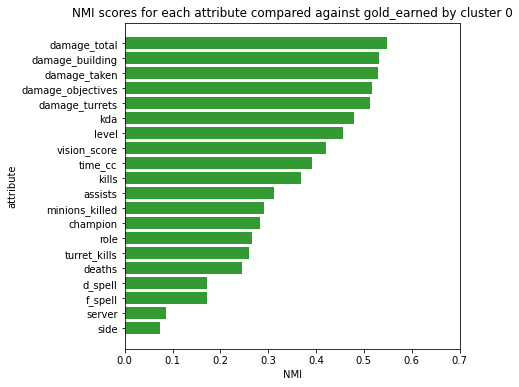

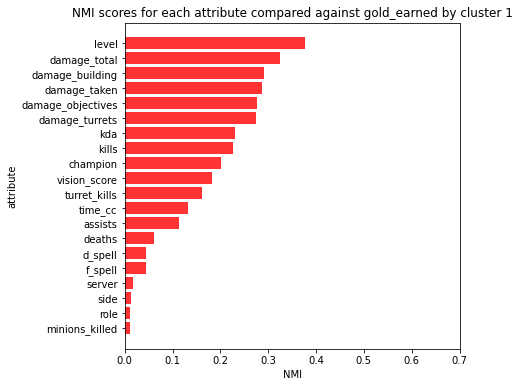

In [62]:
# See the data on bar graphs, and compare
info = (nmiVisualised_cluster0, nmiVisualised_cluster1)
colours = ("green", "red")

for i in range(2):
    # Bar chart of NMI scores for each attribute compared against gold_earned, by clusters
    fig, ax = plt.subplots(figsize=(6,6))
    sortedNMIs = sorted(list(info[i]['gold_earned'].items()), key=lambda x: x[1])

    # Remove gold_earned from sortedNMIs, because we are comparing against gold_earned
    sortedNMIs.pop(len(sortedNMIs)-1)
    sortedNMIs.pop(0)

    # Make graph
    keys = [attribute for attribute, nmi in sortedNMIs]
    vals = [nmi for attribute, nmi in sortedNMIs]
    ax.barh(keys, vals, color=colours[i], alpha=0.8)
    ax.set_title('NMI scores for each attribute compared against gold_earned by cluster ' + str(i))
    ax.set_xlabel('NMI')
    ax.set_ylabel('attribute')
    
    # Make the x-axis scale consistent to easily visualise the differences
    plt.xlim(xmin=0, xmax=0.7)

 **5.9. NMI Scores Against Interested Variables for Feature Selection**

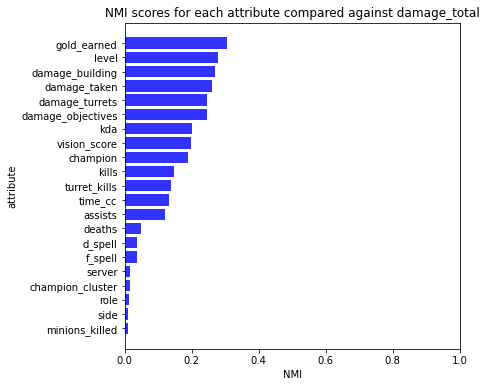

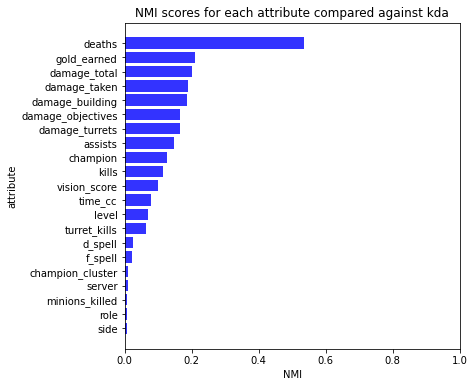

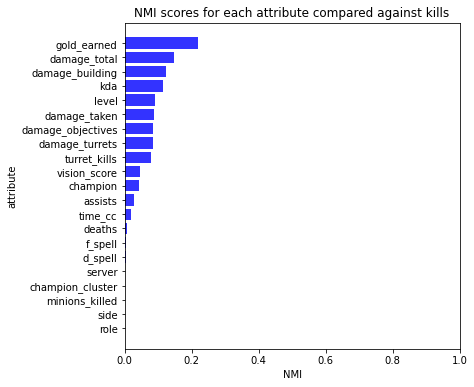

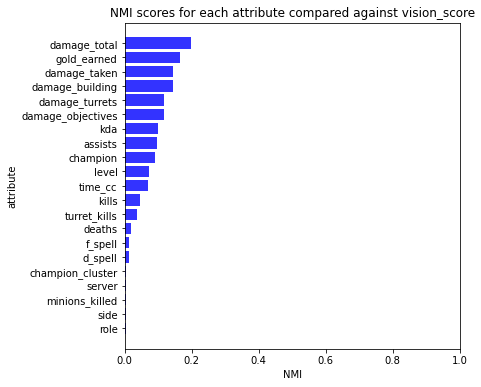

In [63]:
#NMI graph for each dependent variable
for attribute in ('damage_total', 'kda', 'kills', 'vision_score'):
    fig, ax = plt.subplots(figsize=(6,6))
    sortedNMIs = sorted(list(nmiVisualised[attribute].items()), key=lambda x: x[1])

    # Remove `attribute` from sortedNMIs, because we are comparing against `attribute`
    sortedNMIs.pop(len(sortedNMIs)-1)

    # Make graph
    keys = [attribute for attribute, nmi in sortedNMIs]
    vals = [nmi for attribute, nmi in sortedNMIs]
    ax.barh(keys, vals, color='blue', alpha=0.8)
    ax.set_title('NMI scores for each attribute compared against ' + attribute)
    ax.set_xlabel('NMI')
    ax.set_ylabel('attribute')
    plt.xlim(xmin=0, xmax=1)

In [64]:
#Generate top 10 NMIs (excl. damage_turrets and dependent variable) for regression
dependentVariables = ['damage_total', 'kda', 'kills', 'vision_score']
independentVariables = []

for attribute in dependentVariables:
    sortedNMIs = sorted(list(nmiVisualised[attribute].items()), key=lambda x: x[1])
    # Remove `attribute` from sortedNMIs, because we are comparing against `attribute`
    sortedNMIs.pop(len(sortedNMIs)-1)
    keys = [attribute for attribute, nmi in sortedNMIs]
    #Top 10 NMIs
    independentVariables.append(['champion_cluster' if x == 'champion' else x for x in keys[-12:]]) 

for x in independentVariables:
    x.remove('damage_turrets')

for i in range(len(dependentVariables)):
    if dependentVariables[i] in independentVariables[i]:
        independentVariables[i].remove(dependentVariables[i])

independentVariables = [x[-10:] if len(x) > 10 else x for x in independentVariables]
independentVariables

[['turret_kills',
  'kills',
  'champion_cluster',
  'vision_score',
  'kda',
  'damage_objectives',
  'damage_taken',
  'damage_building',
  'level',
  'gold_earned'],
 ['vision_score',
  'kills',
  'champion_cluster',
  'assists',
  'damage_objectives',
  'damage_building',
  'damage_taken',
  'damage_total',
  'gold_earned',
  'deaths'],
 ['champion_cluster',
  'vision_score',
  'turret_kills',
  'damage_objectives',
  'damage_taken',
  'level',
  'kda',
  'damage_building',
  'damage_total',
  'gold_earned'],
 ['time_cc',
  'level',
  'champion_cluster',
  'assists',
  'kda',
  'damage_objectives',
  'damage_building',
  'damage_taken',
  'gold_earned',
  'damage_total']]

### **6. Regression Analysis and Model Evaluation**

We want to set up 4 sets of regressions to understand how gold earned can explain:

1. damage_total
2. kda
3. kills
4. vision_score

Hence, gold earned will be one of our x variables and the 4 variables listed above will be our y variable.

Below steps will involve preprocessing, feature selection, model evaluation and validation of different algorithms.

We will use various supervised learning regression algorithms (the above are all continuous values) and select the best model for analysis/conclusions. Algorithms include:

* Linear regression
* Decision trees
* KNN (excluded)

Model performance metrics to test our model out-of-sample include:

* Accuracy
* R squared
* Adjusted R squared
* Violation of assumptions - for example, multiple regression assumes x variables are not highly correlated with each other (check with scatter plots), residual values have a mean of zero and stationary, constant variance.

May require hyper parameter decision making (e.g. K in KNN) - decided not to. K-fold = 10 given its usual practice.

We will not consider principal components analysis (PCA) as a feature extraction technique as while having an accurate model is valuable, we require interpretability to understand how gold earned influences the above.

#### **6.1. Converting Text Data Into Numerical Data Using Encoding**

We need to transform text categorical data into numerical data, which is a prerequisite for performing regression/classification tasks.

OneHot encoding is considered as our categorical variables do not have an ordinal relationship.

It likely is not suitable for categorical variables with a lot of classes, but we have previously dealt with 'champion' by creating a new variable where it is equal to 0 or 1 depending on whether it belongs 1 of the 2 clusters.

In [65]:
#Define categorical variables
categoricalFeatures = ["side", "role", "minions_killed", "server"]

#Use one-hot encoding to obtain features in numeric form for modelling
pd.get_dummies(allMatchDF[categoricalFeatures])

,side_Blue,side_Red,role_Other,role_TopLane_Jungle,minions_killed_Few,minions_killed_Many,server_EU,server_KR,server_NA
0,1,0,1,0,1,0,0,1,0
2,0,1,1,0,1,0,0,1,0
3,0,1,1,0,0,1,0,1,0
4,0,1,0,1,0,1,0,1,0
5,0,1,1,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...
17223,0,1,1,0,0,1,0,0,1
17224,1,0,1,0,0,1,0,0,1
17225,1,0,1,0,1,0,0,0,1
17226,0,1,0,1,0,1,0,0,1


In [66]:
#Drop categorical features and replace them with numerical dummy variables
modelDS = allMatchDF[allMatchDF.columns.difference(["champion", "side", "role", "minions_killed", "server"])]
modelDS.join(pd.get_dummies(allMatchDF[categoricalFeatures]))

,assists,champion_cluster,d_spell,damage_building,damage_objectives,damage_taken,damage_total,damage_turrets,deaths,f_spell,...,vision_score,side_Blue,side_Red,role_Other,role_TopLane_Jungle,minions_killed_Few,minions_killed_Many,server_EU,server_KR,server_NA
0,6.0,0,14.0,0.0,1524.0,9404.0,15214,0.0,6.0,4.0,...,47.0,1,0,1,0,1,0,0,1,0
2,2.0,1,14.0,444.0,168.0,14079.0,34038,168.0,7.0,4.0,...,38.0,0,1,1,0,1,0,0,1,0
3,8.0,1,14.0,3082.0,1524.0,11128.0,94369,2492.0,3.0,4.0,...,24.0,0,1,1,0,0,1,0,1,0
4,8.0,1,4.0,5488.0,6419.0,20404.0,110580,6419.0,5.0,12.0,...,24.0,0,1,0,1,0,1,0,1,0
5,14.0,0,4.0,1144.0,625.0,11112.0,17852,625.0,3.0,14.0,...,30.0,0,1,1,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17223,10.0,1,4.0,1825.0,1524.0,18806.0,115875,1825.0,8.0,4.0,...,27.0,0,1,1,0,0,1,0,0,1
17224,1.0,1,14.0,887.0,887.0,6804.0,44452,887.0,4.0,4.0,...,7.0,1,0,1,0,0,1,0,0,1
17225,5.0,0,4.0,821.0,360.0,13279.0,19306,360.0,5.0,14.0,...,41.0,1,0,1,0,1,0,0,0,1
17226,5.0,1,4.0,998.0,579.0,29059.0,80116,579.0,10.0,6.0,...,18.0,0,1,0,1,0,1,0,0,1


In [67]:
#Check missing data
features = list(modelDS.columns.values)
for feature in features:
    print(f"{feature:17} has {modelDS[feature].isnull().sum()} missing features")

print("\n", modelDS.shape[0], "ROWS LEFT")

assists           has 0 missing features
champion_cluster  has 0 missing features
d_spell           has 0 missing features
damage_building   has 0 missing features
damage_objectives has 0 missing features
damage_taken      has 0 missing features
damage_total      has 0 missing features
damage_turrets    has 0 missing features
deaths            has 0 missing features
f_spell           has 0 missing features
gold_earned       has 0 missing features
kda               has 0 missing features
kills             has 0 missing features
level             has 0 missing features
time_cc           has 0 missing features
turret_kills      has 0 missing features
vision_score      has 0 missing features

 15405 ROWS LEFT


**6.2. Feature Selection**

We will look at various feature selection techniques as a way to see what features seem to be most appropriate to include. Link with NMI results above. 

In [68]:
#Correlation matrix between independent variables
modelDS.corr()

,assists,champion_cluster,d_spell,damage_building,damage_objectives,damage_taken,damage_total,damage_turrets,deaths,f_spell,gold_earned,kda,kills,level,time_cc,turret_kills,vision_score
assists,1.000000,-0.424720,-0.017849,0.075431,0.004287,0.164490,-0.076180,0.003552,0.049363,0.029679,0.198863,0.325701,0.034302,0.285181,0.431869,0.027376,0.589882
champion_cluster,-0.424720,1.000000,-0.033116,0.319567,0.256580,0.228834,0.574898,0.257117,-0.014262,-0.088116,0.364810,-0.047384,0.339690,0.304528,-0.279639,0.256697,-0.582535
d_spell,-0.017849,-0.033116,1.000000,-0.022235,-0.080555,0.066005,-0.055959,-0.078909,-0.014392,-0.441750,-0.055205,0.005307,-0.013472,-0.003712,0.037377,-0.055421,0.014549
damage_building,0.075431,0.319567,-0.022235,1.000000,0.376277,0.416015,0.657586,0.376411,-0.121888,-0.049337,0.577246,0.266881,0.525203,0.463470,-0.064587,0.447346,-0.044947
damage_objectives,0.004287,0.256580,-0.080555,0.376277,1.000000,0.082178,0.447222,0.952316,-0.134903,-0.050169,0.509042,0.200985,0.376465,0.370468,-0.095649,0.757271,-0.128152
damage_taken,0.164490,0.228834,0.066005,0.416015,0.082178,1.000000,0.545580,0.085405,0.451465,0.064283,0.579741,-0.136418,0.378728,0.611833,0.176081,0.137723,0.097522
damage_total,-0.076180,0.574898,-0.055959,0.657586,0.447222,0.545580,1.000000,0.445504,0.056573,-0.067187,0.853664,0.087186,0.597004,0.747022,-0.081297,0.466265,-0.207254
damage_turrets,0.003552,0.257117,-0.078909,0.376411,0.952316,0.085405,0.445504,1.000000,-0.132940,-0.047509,0.509086,0.200157,0.380466,0.372525,-0.095492,0.755029,-0.128993
deaths,0.049363,-0.014262,-0.014392,-0.121888,-0.134903,0.451465,0.056573,-0.132940,1.000000,0.014482,0.105680,-0.620753,-0.051174,0.133398,0.120691,-0.161495,0.124697
f_spell,0.029679,-0.088116,-0.441750,-0.049337,-0.050169,0.064283,-0.067187,-0.047509,0.014482,1.000000,-0.045100,-0.014950,-0.035458,0.023576,0.067964,-0.047540,0.046163


We would like to avoid having x variables that are strongly correlated with each other. Looking above, the sole concern is the strong correlation between damage_objectives and damage_turrets (0.95). Given, this, we will exclude damage_turrets if both variables exist when running a regression.

 **6.3. Train Test Split**

Train test split and k-fold cross validation are resampling techniques that can be used to validate our models. These steps are done in combination with the model training. 

In [69]:
model_performance_Damage = pd.DataFrame()
model_performance_KDA = pd.DataFrame()
model_performance_Kills = pd.DataFrame()
model_performance_Vision = pd.DataFrame()

#List of dataframes to input model evaluation information
tables = [model_performance_Damage, model_performance_KDA, model_performance_Kills, model_performance_Vision]

Train Test Split (Selected Features Based on NMI):

In [70]:
#Train-Test Split
#Selected y variables
dependentVariables = ['damage_total', 'kda', 'kills', 'vision_score']

tableIndex = 0

for y in dependentVariables:
    modelIndex = 1

    #Obtain set of x and y variables
    X_COLS = independentVariables[tableIndex]
    y_COL = y
    print("Variable " + str(tableIndex))
    print(X_COLS)
    print(y_COL)

    #Split data and convert to numpy array
    X = modelDS[X_COLS].to_numpy()
    y = modelDS[y_COL].to_numpy()

    # Split into train and test (should also have consideration of validation set)
    X_train, X_test, y_train, y_test = train_test_split(modelDS[X_COLS], modelDS[y_COL], test_size=0.2)
    
    #Fit data on each algorithm
    for algorithm in [LinearRegression(), DecisionTreeRegressor()]:

        # Standardisation
        scaler = StandardScaler().fit(X_train)
        X_train = scaler.transform(X_train)
        X_test = scaler.transform(X_test)

        # Model fitting/training
        model = algorithm.fit(X_train, y_train)  
        
        # Predictions
        y_pred = model.predict(X_test)
        y_pred_train = model.predict(X_train)

        # Scores
        RMSEScore = (mean_squared_error(y_test, y_pred))**(1/2)
        MAEScore = mean_absolute_error(y_test, y_pred)
        TestR2Score = r2_score(y_test, y_pred)
        TrainR2Score = r2_score(y_train, y_pred_train)
        print(f"RMSE: {RMSEScore}")
        print(f"MAE: {MAEScore}")
        print(f"Test R2: {TestR2Score}")
        print(f"Train R2: {TrainR2Score}")

        #Save in table
        tables[tableIndex].loc[modelIndex, 
        ['Split', 'Algorithm', 'Features','RMSE', 'MAE', 'R2 (Test)', 'R2 (Train)']] = 'Train-Test Split (Test = 20%)', str(algorithm), 'Top 10 NMIs',RMSEScore, MAEScore, TestR2Score, TrainR2Score

        modelIndex += 1
        
    tableIndex += 1

Variable 0
['turret_kills', 'kills', 'champion_cluster', 'vision_score', 'kda', 'damage_objectives', 'damage_taken', 'damage_building', 'level', 'gold_earned']
damage_total
RMSE: 24865.55793697671
MAE: 16950.780150536833
Test R2: 0.8739359973657449
Train R2: 0.8847623451637685
RMSE: 29706.638996450496
MAE: 18800.270042194094
Test R2: 0.8200707736911423
Train R2: 1.0
Variable 1
['vision_score', 'kills', 'champion_cluster', 'assists', 'damage_objectives', 'damage_building', 'damage_taken', 'damage_total', 'gold_earned', 'deaths']
kda
RMSE: 2.5199769640281287
MAE: 1.6635385425229643
Test R2: 0.6007918719755674
Train R2: 0.6087092419164435
RMSE: 0.26114803430401606
MAE: 0.08615044163261856
Test R2: 0.9957127406520535
Train R2: 1.0
Variable 2
['champion_cluster', 'vision_score', 'turret_kills', 'damage_objectives', 'damage_taken', 'level', 'kda', 'damage_building', 'damage_total', 'gold_earned']
kills
RMSE: 2.0274204369852367
MAE: 1.531269834035664
Test R2: 0.768735405451825
Train R2: 0.773

 **6.4. K-Fold Cross Validation**

We have decided to use k-fold cross validation over train test split as we believe the pros outweights the cons (compute time).

K-Fold CV (selected features based on NMI):

In [71]:
#Number of splits
k = 10 
kf_CV = KFold(n_splits=k)

tableIndex = 0

#Selected y variables
dependentVariables = ['damage_total', 'kda', 'kills', 'vision_score']

for y in dependentVariables:
    modelIndex = 3

    #Obtain set of x and y variables
    X_COLS = independentVariables[tableIndex]
    y_COL = y
    print("Variable " + str(tableIndex))
    print(X_COLS)
    print(y_COL)

    #Split data and convert to numpy array for model fitting
    X = modelDS[X_COLS].to_numpy()
    y = modelDS[y_COL].to_numpy()

    #Fit data on each algorithm
    for algorithm in [LinearRegression(), DecisionTreeRegressor()]:

        #For each algorithm, we will append scores for k-splits
        MSEScores = []
        MAEScores = []
        TestR2Scores = []
        TrainR2Scores = []

        for train_index, test_index in kf_CV.split(X):
            # train-test split
            X_train, X_test = X[train_index], X[test_index]
            y_train, y_test = y[train_index], y[test_index]
            
            # Standardisation
            scaler = StandardScaler().fit(X_train)
            X_train = scaler.transform(X_train)
            X_test = scaler.transform(X_test)

            # Model fitting/training
            model = algorithm.fit(X_train, y_train)  
            
            # Predictions
            y_pred = model.predict(X_test)
            y_pred_train = model.predict(X_train)
            
            # Append scores
            MSEScores.append(mean_squared_error(y_test, y_pred))
            MAEScores.append(mean_absolute_error(y_test, y_pred))
            TestR2Scores.append(r2_score(y_test, y_pred))
            TrainR2Scores.append(r2_score(y_train, y_pred_train))
        
        #After all k-splits, obtain average score for algorithm
        avgRMSEScore = ((sum(MSEScores))**(1/2))/k
        avgMAEScore = sum(MAEScores)/k
        avgTestR2Score = sum(TestR2Scores)/k
        avgTrainR2Score = sum(TrainR2Scores)/k
        
        #Save in table
        tables[tableIndex].loc[modelIndex, ['Split', 'Algorithm', 'Features','RMSE', 'MAE', 'R2 (Test)', 'R2 (Train)']] = 'K-Fold CV (K = 10)', str(algorithm), 'Top 10 NMIs',avgRMSEScore, avgMAEScore, avgTestR2Score, avgTrainR2Score
        modelIndex += 1
    
    tableIndex += 1

Variable 0
['turret_kills', 'kills', 'champion_cluster', 'vision_score', 'kda', 'damage_objectives', 'damage_taken', 'damage_building', 'level', 'gold_earned']
damage_total
Variable 1
['vision_score', 'kills', 'champion_cluster', 'assists', 'damage_objectives', 'damage_building', 'damage_taken', 'damage_total', 'gold_earned', 'deaths']
kda
Variable 2
['champion_cluster', 'vision_score', 'turret_kills', 'damage_objectives', 'damage_taken', 'level', 'kda', 'damage_building', 'damage_total', 'gold_earned']
kills
Variable 3
['time_cc', 'level', 'champion_cluster', 'assists', 'kda', 'damage_objectives', 'damage_building', 'damage_taken', 'gold_earned', 'damage_total']
vision_score


K-fold CV (all features):

In [72]:
#Number of splits
k = 10 
kf_CV = KFold(n_splits=k)

#Index for tables
tableIndex = 0

#Selected y variables
dependentVariables = ['damage_total', 'kda', 'kills', 'vision_score']

for y in dependentVariables:
    modelIndex = 5

    #Obtain set of x and y variables
    X_COLS = modelDS.columns.tolist()
    X_COLS.remove(y)
    X_COLS.remove('damage_turrets')
    y_COL = y
    print("Variable " + str(tableIndex))
    print(X_COLS)
    print(y_COL)

    #Split data and convert to numpy array for model fitting
    X = modelDS[X_COLS].to_numpy()
    y = modelDS[y_COL].to_numpy()

    #Fit data on each algorithm
    for algorithm in [LinearRegression(), DecisionTreeRegressor()]:

        #For each algorithm, we will append scores for k-splits
        MSEScores = []
        MAEScores = []
        TestR2Scores = []
        TrainR2Scores = []

        for train_index, test_index in kf_CV.split(X):
            # train-test split
            X_train, X_test = X[train_index], X[test_index]
            y_train, y_test = y[train_index], y[test_index]
            
            # Standardisation
            scaler = StandardScaler().fit(X_train)
            X_train = scaler.transform(X_train)
            X_test = scaler.transform(X_test)

            # Model fitting/training
            model = algorithm.fit(X_train, y_train)  
            
            # Predictions
            y_pred = model.predict(X_test)
            y_pred_train = model.predict(X_train)
            
            # Append scores
            MSEScores.append(mean_squared_error(y_test, y_pred))
            MAEScores.append(mean_absolute_error(y_test, y_pred))
            TestR2Scores.append(r2_score(y_test, y_pred))
            TrainR2Scores.append(r2_score(y_train, y_pred_train))
        
        #After all k-splits, obtain average score for algorithm
        avgRMSEScore = ((sum(MSEScores))**(1/2))/k
        avgMAEScore = sum(MAEScores)/k
        avgTestR2Score = sum(TestR2Scores)/k
        avgTrainR2Score = sum(TrainR2Scores)/k
        
        #Save in table
        tables[tableIndex].loc[modelIndex, ['Split', 'Algorithm', 'Features','RMSE', 'MAE', 'R2 (Test)', 'R2 (Train)']] = 'K-Fold CV (K = 10)', str(algorithm), 'All Variables',avgRMSEScore, avgMAEScore, avgTestR2Score, avgTrainR2Score
        modelIndex += 1
    
    tableIndex += 1

Variable 0
['assists', 'champion_cluster', 'd_spell', 'damage_building', 'damage_objectives', 'damage_taken', 'deaths', 'f_spell', 'gold_earned', 'kda', 'kills', 'level', 'time_cc', 'turret_kills', 'vision_score']
damage_total
Variable 1
['assists', 'champion_cluster', 'd_spell', 'damage_building', 'damage_objectives', 'damage_taken', 'damage_total', 'deaths', 'f_spell', 'gold_earned', 'kills', 'level', 'time_cc', 'turret_kills', 'vision_score']
kda
Variable 2
['assists', 'champion_cluster', 'd_spell', 'damage_building', 'damage_objectives', 'damage_taken', 'damage_total', 'deaths', 'f_spell', 'gold_earned', 'kda', 'level', 'time_cc', 'turret_kills', 'vision_score']
kills
Variable 3
['assists', 'champion_cluster', 'd_spell', 'damage_building', 'damage_objectives', 'damage_taken', 'damage_total', 'deaths', 'f_spell', 'gold_earned', 'kda', 'kills', 'level', 'time_cc', 'turret_kills']
vision_score


**6.5. Summary Table for damage_total**

In [73]:
model_performance_Damage

,Split,Algorithm,Features,RMSE,MAE,R2 (Test),R2 (Train)
1,Train-Test Split (Test = 20%),LinearRegression(),Top 10 NMIs,24865.557937,16950.780151,0.873936,0.884762
2,Train-Test Split (Test = 20%),DecisionTreeRegressor(),Top 10 NMIs,29706.638996,18800.270042,0.820071,1.000000
3,K-Fold CV (K = 10),LinearRegression(),Top 10 NMIs,7519.181201,16891.073705,0.882628,0.882634
4,K-Fold CV (K = 10),DecisionTreeRegressor(),Top 10 NMIs,9101.825486,18634.276702,0.827651,1.000000
5,K-Fold CV (K = 10),LinearRegression(),All Variables,7071.242257,15530.149912,0.896360,0.896342
6,K-Fold CV (K = 10),DecisionTreeRegressor(),All Variables,8904.293676,18180.072338,0.835068,1.000000


**6.6. Residual Analysis for damage_total**

damage_total


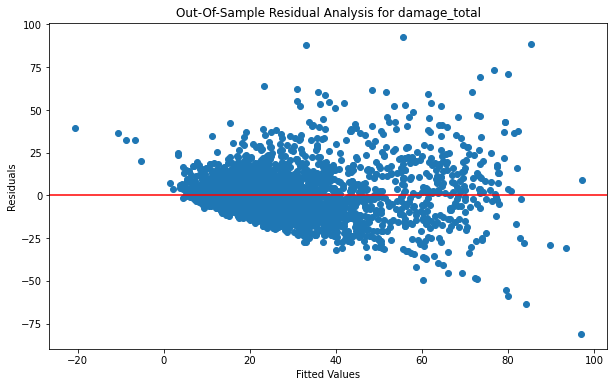

In [74]:
#Residuals from model
X = modelDS[dependentVariables[0]].to_numpy()
y = modelDS[independentVariables[0]].to_numpy()
print(dependentVariables[0])
X_train, X_test, y_train, y_test = train_test_split(modelDS[X_COLS], modelDS[y_COL], test_size=0.2)
model = LinearRegression().fit(X_train, y_train)
y_pred = model.predict(X_test)
residuals = (y_test - y_pred)

fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(y_pred, residuals)
ax.set_title('Out-Of-Sample Residual Analysis for damage_total')
ax.set_xlabel('Fitted Values')
ax.set_ylabel('Residuals')
plt.axhline(y=0, color='r', linestyle='-')

plt.show()

**6.7. Linear Regression Output and Feature Importance for damage_total**

In [75]:
#Fit linear regression model and print summary table
X_COLS = independentVariables[0]
y_COL = dependentVariables[0]
print(dependentVariables[0])
X_train, X_test, y_train, y_test = train_test_split(modelDS[X_COLS], modelDS[y_COL], test_size=0.2)
X2 = sm.add_constant(X_train)
est = sm.OLS(y_train, X2)
est2 = est.fit()
est2.summary()

damage_total


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           damage_total   R-squared:                       0.882
Model:                            OLS   Adj. R-squared:                  0.882
Method:                 Least Squares   F-statistic:                     9188.
Date:                Mon, 06 Jun 2022   Prob (F-statistic):               0.00
Time:                        14:19:47   Log-Likelihood:            -1.4170e+05
No. Observations:               12324   AIC:                         2.834e+05
Df Residuals:                   12313   BIC:                         2.835e+05
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              -6.99e+04   1596.904    -43.770      0.000    -7.3e+04   -6.68e+04
turret_kills      -2014.8900    278.113     -7.245      0.000   -2560.034   -1469.746
kills             -4815.9940     95.964    -50.186      0.000   -5004.098   -4627.890
champion_cluster   3.052e+04    836.562     36.485      0.000    2.89e+04    3.22e+04
vision_score       -632.3621     14.652    -43.158      0.000    -661.083    -603.641
kda                -438.5226     65.105     -6.736      0.000    -566.139    -310.906
damage_objectives    -1.0734      0.109     -9.811      0.000      -1.288      -0.859
damage_taken         -0.0091      0.033     -0.275      0.784      -0.074       0.056
damage_building       1.7250      0.028     60.557      0.000       1.669       1.781
level              -532.7875    205.926     -2.587      0.010    -936.435    -129.140
gold_earned          18.9299      0.199     95.323      0.000      18.541      19.319
==============================================================================
Omnibus:                     5015.825   Durbin-Watson:                   2.005
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           105860.142
Skew:                           1.444   Prob(JB):                         0.00
Kurtosis:                      17.064   Cond. No.                     2.06e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.06e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

A p-value of less than 0.05 is statistically significant. It indicates strong evidence against the null hypothesis, as there is less than a 5% probability the null (that the coefficient is euqal to 0) is correct. Therefore, we reject the null hypothesis, and accept the alternative hypothesis that the coefficient is non-zero. At 95% CI.

In [76]:
#Suggests gold_earned does have a statistically significant effect on damage_total.
est2.pvalues.loc['gold_earned']

0.0

Text(0, 0.5, 'Features')

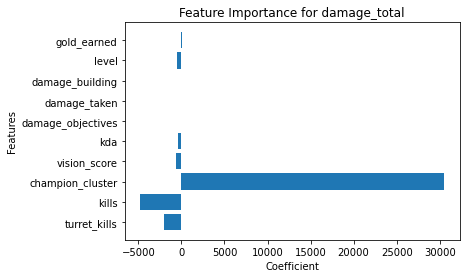

In [77]:
#This graph helps show the relative importance of different features on damage_total.
#We can see that gold_earned has a relatively neglible impact on damage_total.
#This may imply to interested audiences that players should not focus on earning gold if they want to
#Optimise for damage.
#Note we can interpret coefficients this way given that we have standardised the dataset so the units are the same
#for each variable.
fig, ax = plt.subplots()
ax.barh(list(est2.params.index[1:]), list(est2.params.values[1:]))
ax.set_title('Feature Importance for damage_total')
ax.set_xlabel('Coefficient')
ax.set_ylabel('Features')

**6.8. Summary Table for KDA**

In [78]:
model_performance_KDA

,Split,Algorithm,Features,RMSE,MAE,R2 (Test),R2 (Train)
1,Train-Test Split (Test = 20%),LinearRegression(),Top 10 NMIs,2.519977,1.663539,0.600792,0.608709
2,Train-Test Split (Test = 20%),DecisionTreeRegressor(),Top 10 NMIs,0.261148,0.086150,0.995713,1.000000
3,K-Fold CV (K = 10),LinearRegression(),Top 10 NMIs,0.775673,1.619047,0.605594,0.607248
4,K-Fold CV (K = 10),DecisionTreeRegressor(),Top 10 NMIs,0.088559,0.081354,0.994872,1.000000
5,K-Fold CV (K = 10),LinearRegression(),All Variables,0.775316,1.618229,0.605892,0.608016
6,K-Fold CV (K = 10),DecisionTreeRegressor(),All Variables,0.095005,0.090509,0.994099,1.000000


**6.9. Residual Analysis for KDA**

kda


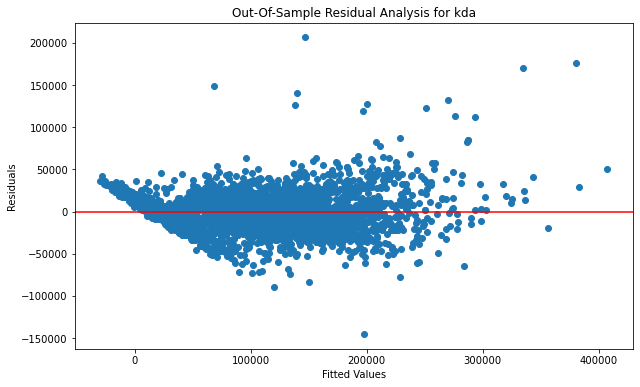

In [79]:
#Residuals from model
X = modelDS[dependentVariables[1]].to_numpy()
y = modelDS[independentVariables[1]].to_numpy()
print(dependentVariables[1])
X_train, X_test, y_train, y_test = train_test_split(modelDS[X_COLS], modelDS[y_COL], test_size=0.2)
model = LinearRegression().fit(X_train, y_train)
y_pred = model.predict(X_test)
residuals = (y_test - y_pred)

fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(y_pred, residuals)
ax.set_title('Out-Of-Sample Residual Analysis for kda')
ax.set_xlabel('Fitted Values')
ax.set_ylabel('Residuals')
plt.axhline(y=0, color='r', linestyle='-')

plt.show()

**6.10. Linear Regression Output and Feature Importance for KDA**

In [80]:
#Fit linear regression model and print summary table
X_COLS = independentVariables[1]
y_COL = dependentVariables[1]
print(dependentVariables[1])
X_train, X_test, y_train, y_test = train_test_split(modelDS[X_COLS], modelDS[y_COL], test_size=0.2)
X2 = sm.add_constant(X_train)
est = sm.OLS(y_train, X2)
est2 = est.fit()
est2.summary()

kda


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    kda   R-squared:                       0.607
Model:                            OLS   Adj. R-squared:                  0.607
Method:                 Least Squares   F-statistic:                     1904.
Date:                Mon, 06 Jun 2022   Prob (F-statistic):               0.00
Time:                        14:19:47   Log-Likelihood:                -28442.
No. Observations:               12324   AIC:                         5.691e+04
Df Residuals:                   12313   BIC:                         5.699e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 5.6466      0.125     45.158      0.000       5.402       5.892
vision_score         -0.0028      0.002     -1.742      0.082      -0.006       0.000
kills                 0.3491      0.010     34.148      0.000       0.329       0.369
champion_cluster     -0.0508      0.090     -0.566      0.572      -0.227       0.125
assists               0.2698      0.006     48.177      0.000       0.259       0.281
damage_objectives  3.601e-05   9.23e-06      3.900      0.000    1.79e-05    5.41e-05
damage_building    1.364e-05   3.34e-06      4.078      0.000    7.08e-06    2.02e-05
damage_taken      -7.912e-06   3.55e-06     -2.229      0.026   -1.49e-05   -9.55e-07
damage_total       2.221e-06   9.88e-07      2.248      0.025    2.84e-07    4.16e-06
gold_earned          -0.0002   2.41e-05     -7.722      0.000      -0.000      -0.000
deaths               -0.7685      0.009    -84.356      0.000      -0.786      -0.751
==============================================================================
Omnibus:                     7630.070   Durbin-Watson:                   1.997
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            86290.683
Skew:                           2.853   Prob(JB):                         0.00
Kurtosis:                      14.640   Cond. No.                     8.58e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.58e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [81]:
#P-value for gold earned coefficient
print(round(est2.pvalues.loc['gold_earned'], 100))

1.2339885555390652e-14


Text(0, 0.5, 'Features')

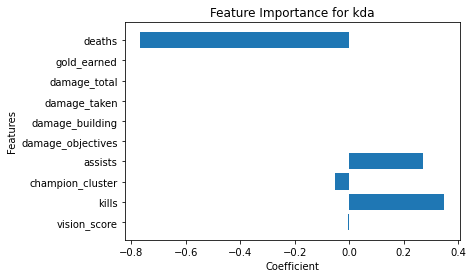

In [82]:
#Bar graph showing coefficients for each independent variable
fig, ax = plt.subplots()
ax.barh(list(est2.params.index[1:]), list(est2.params.values[1:]))
ax.set_title('Feature Importance for kda')
ax.set_xlabel('Coefficient')
ax.set_ylabel('Features')

**6.11. Summary Table for kills**

For damage_total, it seems that linear regression performs the best.

In [83]:
model_performance_Kills

,Split,Algorithm,Features,RMSE,MAE,R2 (Test),R2 (Train)
1,Train-Test Split (Test = 20%),LinearRegression(),Top 10 NMIs,2.027420,1.531270,0.768735,0.773039
2,Train-Test Split (Test = 20%),DecisionTreeRegressor(),Top 10 NMIs,2.546676,1.818890,0.635104,1.000000
3,K-Fold CV (K = 10),LinearRegression(),Top 10 NMIs,0.644646,1.551986,0.770878,0.772324
4,K-Fold CV (K = 10),DecisionTreeRegressor(),Top 10 NMIs,0.841856,1.885958,0.609271,1.000000
5,K-Fold CV (K = 10),LinearRegression(),All Variables,0.612842,1.454830,0.793029,0.794566
6,K-Fold CV (K = 10),DecisionTreeRegressor(),All Variables,0.752396,1.603968,0.687359,1.000000


**6.12. Residual Analysis for kills**

kills


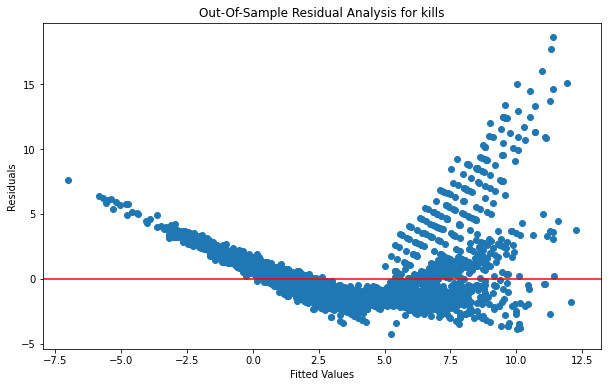

In [84]:
#Residuals from model
X = modelDS[dependentVariables[2]].to_numpy()
y = modelDS[independentVariables[2]].to_numpy()
print(dependentVariables[2])
X_train, X_test, y_train, y_test = train_test_split(modelDS[X_COLS], modelDS[y_COL], test_size=0.2)
model = LinearRegression().fit(X_train, y_train)
y_pred = model.predict(X_test)
residuals = (y_test - y_pred)

fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(y_pred, residuals)
ax.set_title('Out-Of-Sample Residual Analysis for kills')
ax.set_xlabel('Fitted Values')
ax.set_ylabel('Residuals')
plt.axhline(y=0, color='r', linestyle='-')

plt.show()

**6.13. Linear Regression Output and Feature Importance for kills**

In [85]:
#Fit linear regression model and print summary table
X_COLS = independentVariables[2]
y_COL = dependentVariables[2]
print(dependentVariables[2])
X_train, X_test, y_train, y_test = train_test_split(modelDS[X_COLS], modelDS[y_COL], test_size=0.2)
X2 = sm.add_constant(X_train)
est = sm.OLS(y_train, X2)
est2 = est.fit()
est2.summary()

kills


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  kills   R-squared:                       0.770
Model:                            OLS   Adj. R-squared:                  0.770
Method:                 Least Squares   F-statistic:                     4121.
Date:                Mon, 06 Jun 2022   Prob (F-statistic):               0.00
Time:                        14:19:47   Log-Likelihood:                -26272.
No. Observations:               12324   AIC:                         5.257e+04
Df Residuals:                   12313   BIC:                         5.265e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -1.1089      0.147     -7.567      0.000      -1.396      -0.822
champion_cluster      1.1637      0.074     15.708      0.000       1.019       1.309
vision_score         -0.0435      0.001    -34.093      0.000      -0.046      -0.041
turret_kills         -0.1170      0.024     -4.897      0.000      -0.164      -0.070
damage_objectives    -0.0002   9.31e-06    -17.248      0.000      -0.000      -0.000
damage_taken       6.199e-06   2.81e-06      2.207      0.027    6.92e-07    1.17e-05
level                -0.6938      0.016    -42.346      0.000      -0.726      -0.662
kda                   0.1700      0.006     30.766      0.000       0.159       0.181
damage_building    7.989e-05   2.69e-06     29.657      0.000    7.46e-05    8.52e-05
damage_total      -3.535e-05   6.96e-07    -50.793      0.000   -3.67e-05    -3.4e-05
gold_earned           0.0018   1.49e-05    123.263      0.000       0.002       0.002
==============================================================================
Omnibus:                      633.696   Durbin-Watson:                   2.007
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1196.226
Skew:                           0.387   Prob(JB):                    1.75e-260
Kurtosis:                       4.315   Cond. No.                     1.10e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.1e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [86]:
#P-value for gold earned coefficient
print(round(est2.pvalues.loc['gold_earned'], 4))

0.0


Text(0, 0.5, 'Features')

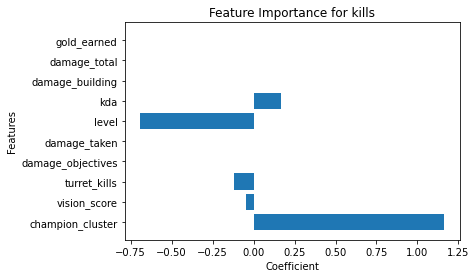

In [87]:
#Bar graph showing coefficients for each independent variable
fig, ax = plt.subplots()
ax.barh(list(est2.params.index[1:]), list(est2.params.values[1:]))
ax.set_title('Feature Importance for kills')
ax.set_xlabel('Coefficient')
ax.set_ylabel('Features')

**6.14. Summary Table for vision_score**

In [88]:
model_performance_Vision

,Split,Algorithm,Features,RMSE,MAE,R2 (Test),R2 (Train)
1,Train-Test Split (Test = 20%),LinearRegression(),Top 10 NMIs,13.889037,9.885416,0.556254,0.550581
2,Train-Test Split (Test = 20%),DecisionTreeRegressor(),Top 10 NMIs,16.122296,10.623499,0.402079,0.999233
3,K-Fold CV (K = 10),LinearRegression(),Top 10 NMIs,4.362365,9.724398,0.547601,0.551979
4,K-Fold CV (K = 10),DecisionTreeRegressor(),Top 10 NMIs,5.109394,10.804317,0.378340,0.998980
5,K-Fold CV (K = 10),LinearRegression(),All Variables,4.247203,9.517253,0.570748,0.576165
6,K-Fold CV (K = 10),DecisionTreeRegressor(),All Variables,5.018547,10.607807,0.400166,0.999204


**6.15. Residual Analysis for damage_total**

vision_score


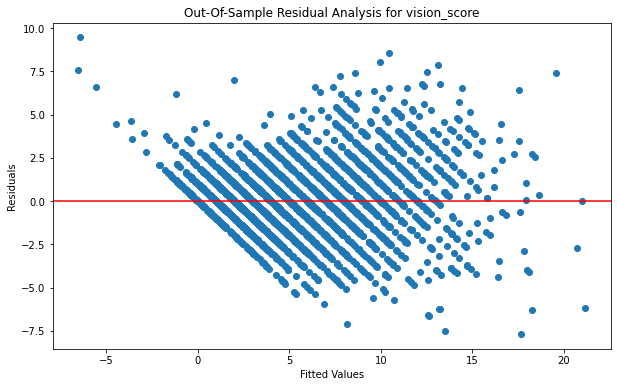

In [89]:
#Residuals from model
X = modelDS[dependentVariables[3]].to_numpy()
y = modelDS[independentVariables[3]].to_numpy()
print(dependentVariables[3])
X_train, X_test, y_train, y_test = train_test_split(modelDS[X_COLS], modelDS[y_COL], test_size=0.2)
model = LinearRegression().fit(X_train, y_train)
y_pred = model.predict(X_test)
residuals = (y_test - y_pred)

fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(y_pred, residuals)
ax.set_title('Out-Of-Sample Residual Analysis for vision_score')
ax.set_xlabel('Fitted Values')
ax.set_ylabel('Residuals')
plt.axhline(y=0, color='r', linestyle='-')

plt.show()

**6.16. Linear Regression Output and Feature Importance for vision_score**

In [90]:
#Fit linear regression model and print summary table
X_COLS = independentVariables[3]
y_COL = dependentVariables[3]
print(dependentVariables[3])
X_train, X_test, y_train, y_test = train_test_split(modelDS[X_COLS], modelDS[y_COL], test_size=0.2)
X2 = sm.add_constant(X_train)
est = sm.OLS(y_train, X2)
est2 = est.fit()
est2.summary()

vision_score


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           vision_score   R-squared:                       0.558
Model:                            OLS   Adj. R-squared:                  0.557
Method:                 Least Squares   F-statistic:                     1552.
Date:                Mon, 06 Jun 2022   Prob (F-statistic):               0.00
Time:                        14:19:47   Log-Likelihood:                -49787.
No. Observations:               12324   AIC:                         9.960e+04
Df Residuals:                   12313   BIC:                         9.968e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                10.6886      0.992     10.773      0.000       8.744      12.633
time_cc               0.1380      0.010     13.651      0.000       0.118       0.158
level                 1.6796      0.112     14.930      0.000       1.459       1.900
champion_cluster    -23.9930      0.464    -51.725      0.000     -24.902     -23.084
assists               0.8711      0.032     26.830      0.000       0.807       0.935
kda                  -0.4900      0.038    -12.901      0.000      -0.564      -0.416
damage_objectives    -0.0007   4.81e-05    -15.160      0.000      -0.001      -0.001
damage_building       0.0002   1.79e-05     13.701      0.000       0.000       0.000
damage_taken       -5.28e-05   1.91e-05     -2.768      0.006   -9.02e-05   -1.54e-05
gold_earned           0.0021   9.86e-05     20.956      0.000       0.002       0.002
damage_total         -0.0001   4.76e-06    -24.200      0.000      -0.000      -0.000
==============================================================================
Omnibus:                     2632.211   Durbin-Watson:                   2.002
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            11631.729
Skew:                           0.983   Prob(JB):                         0.00
Kurtosis:                       7.335   Cond. No.                     1.10e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.1e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [91]:
#P-value for gold earned coefficient
print(round(est2.pvalues.loc['gold_earned'], 4))

0.0


Text(0, 0.5, 'Features')

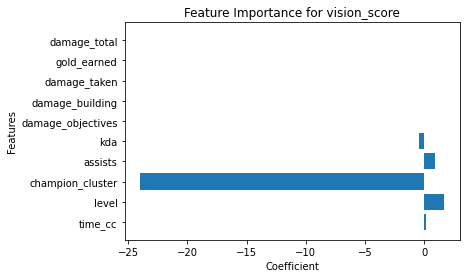

In [92]:
#Bar graph showing coefficients for each independent variable
fig, ax = plt.subplots()
ax.barh(list(est2.params.index[1:]), list(est2.params.values[1:]))
ax.set_title('Feature Importance for vision_score')
ax.set_xlabel('Coefficient')
ax.set_ylabel('Features')